# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

**Reading the dataset**

In [4]:
cz_df=pd.read_csv("cubic_zirconia.csv",index_col=0)

In [5]:
cz_df.head()

carat        cut color clarity  depth  table     x     y     z  price
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [6]:
cz_df.tail()

carat        cut color clarity  depth  table     x     y     z  price
26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

**EDA**

In [7]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
cz_df.shape

(26967, 10)

In [9]:
cz_df.duplicated().sum()

34

There are 34 duplicated values. Let us remove those rows.

In [10]:
cz_df.drop_duplicates(inplace=True)

In [11]:
cz_df.duplicated().sum()

0

We have removed the duplicate rows in the dataset

In [12]:
cz_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Only the depth column has null values.

In [13]:
cz_df.describe(include="all").T

count unique    top   freq        mean          std    min    25%  \
carat    26933.0    NaN    NaN    NaN     0.79801     0.477237    0.2    0.4   
cut        26933      5  Ideal  10805         NaN          NaN    NaN    NaN   
color      26933      7      G   5653         NaN          NaN    NaN    NaN   
clarity    26933      8    SI1   6565         NaN          NaN    NaN    NaN   
depth    26236.0    NaN    NaN    NaN   61.745285     1.412243   50.8   61.0   
table    26933.0    NaN    NaN    NaN    57.45595     2.232156   49.0   56.0   
x        26933.0    NaN    NaN    NaN    5.729346     1.127367    0.0   4.71   
y        26933.0    NaN    NaN    NaN    5.733102     1.165037    0.0   4.71   
z        26933.0    NaN    NaN    NaN    3.537769     0.719964    0.0    2.9   
price    26933.0    NaN    NaN    NaN  3937.52612  4022.551862  326.0  945.0   

            50%     75%      max  
carat       0.7    1.05      4.5  
cut         NaN     NaN      NaN  
color       NaN     NaN      NaN  
clarity     NaN     NaN      NaN  
depth      61.8    62.5     73.6  
table      57.0    59.0     79.0  
x          5.69    6.55    10.23  
y           5.7    6.54     58.9  
z          3.52    4.04     31.8  
price    2375.0  5356.0  18818.0

The length, width and height variables have minimum value as 0. This is not possible. we need to impute the values or drop them.

In [14]:
feature_list=["carat","depth","table","x","y","z"]

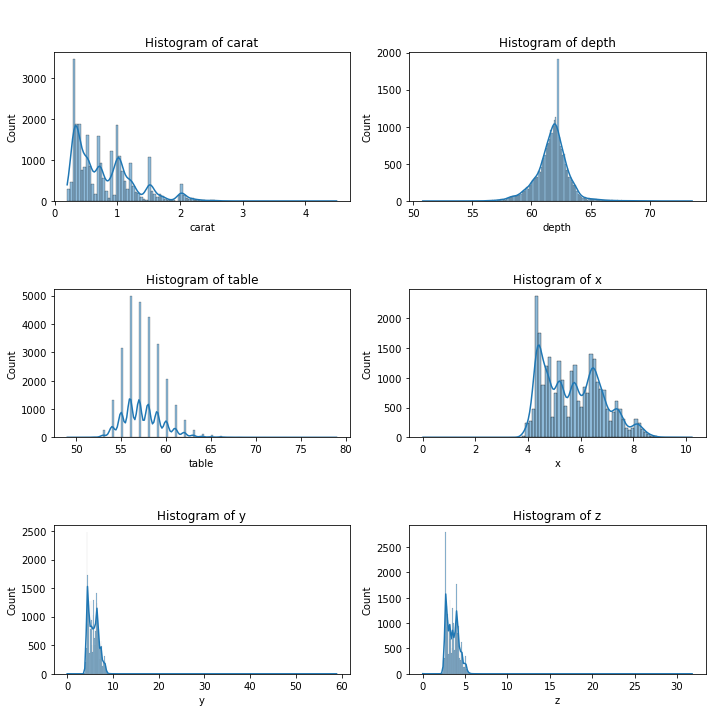

In [13]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.histplot(cz_df[feature_list[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list[i]))
    plt.tight_layout()

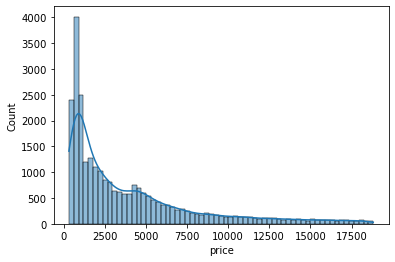

In [14]:
sns.histplot(cz_df["price"],kde=True);

In [15]:
cz_df.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

We can see that all the columns except the depth column has skewness.

Let us try to reduce the skewness in the dependent variable using transformation.

In [16]:
from sklearn.preprocessing import FunctionTransformer   

In [17]:
log_transformer = FunctionTransformer(np.log1p,inverse_func=np.exp)
log_transformer

FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'exp'>)

In [18]:
cz_df["log_price"] = log_transformer.fit_transform(cz_df[["price"]])

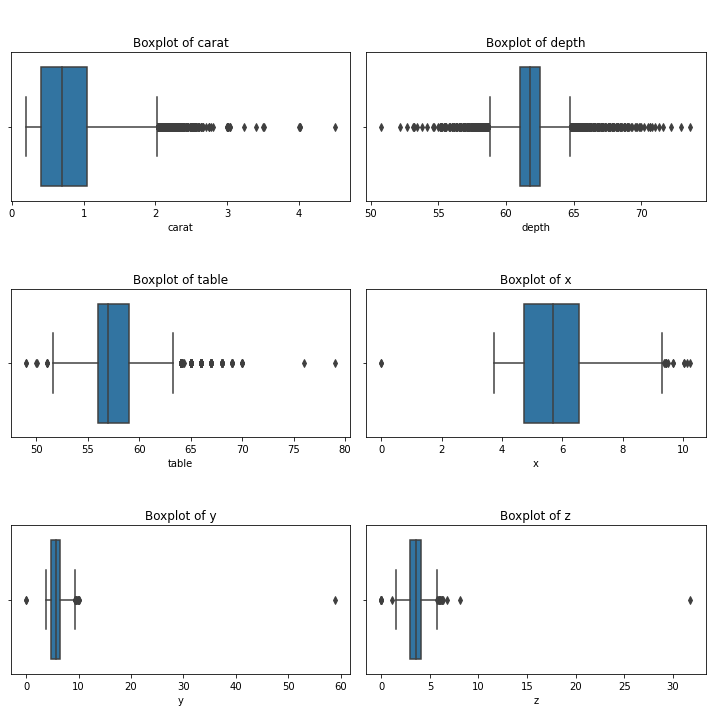

In [19]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(cz_df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

We can see that all the variables have outliers

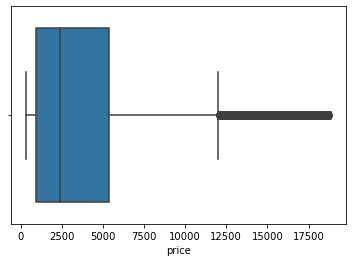

In [20]:
sns.boxplot(cz_df["price"]);

The price column has outliers, but it could be a genuine case. But since we transformed the price data using the log function, the log price column will not have any outliers.

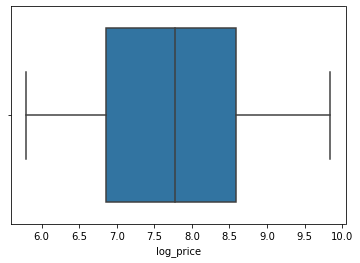

In [21]:
sns.boxplot(cz_df["log_price"]);

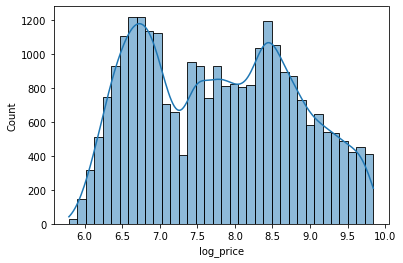

In [22]:
sns.histplot(cz_df["log_price"],kde=True);

We can see that, after log transformnation, the outliers have gone. Let us also check the skewness of the column.

In [23]:
cz_df["log_price"].skew()

0.128626595132791

We can see that the skewness has reduced from 1.6 to 0.12.

In [24]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [25]:
for i in range (len(feature_list)):
    LL1,UL1=remove_outlier(cz_df[feature_list[i]])
    print("The percentage of outliers in",feature_list[i],"Upper is",round(cz_df[cz_df[feature_list[i]]>UL1][feature_list[i]].count()*100/len(cz_df),2),"%")
    print("The percentage of outliers in",feature_list[i],"lower is",round(cz_df[cz_df[feature_list[i]]<LL1][feature_list[i]].count()*100/len(cz_df),2),"%")

The percentage of outliers in carat Upper is 2.44 %
The percentage of outliers in carat lower is 0.0 %
The percentage of outliers in depth Upper is 1.8 %
The percentage of outliers in depth lower is 2.72 %
The percentage of outliers in table Upper is 1.15 %
The percentage of outliers in table lower is 0.03 %
The percentage of outliers in x Upper is 0.04 %
The percentage of outliers in x lower is 0.01 %
The percentage of outliers in y Upper is 0.04 %
The percentage of outliers in y lower is 0.01 %
The percentage of outliers in z Upper is 0.05 %
The percentage of outliers in z lower is 0.03 %


In [26]:
cz_df["clarity"].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

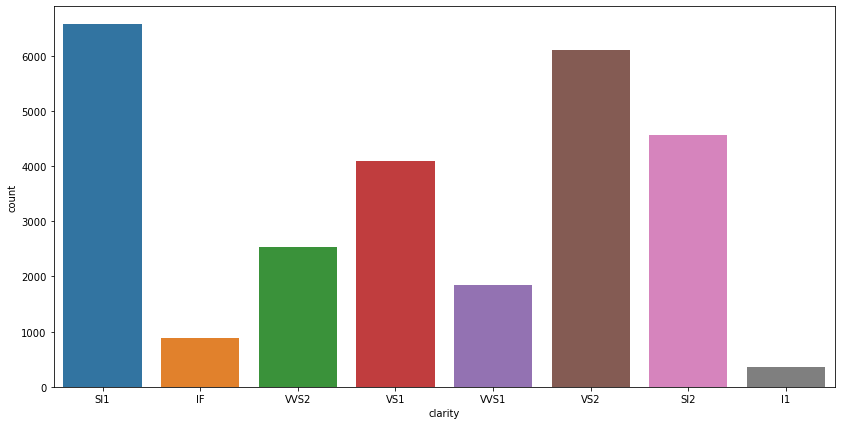

In [27]:
plt.figure(figsize=(14,7))
sns.countplot(cz_df["clarity"]);

In [28]:
cz_df["color"].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

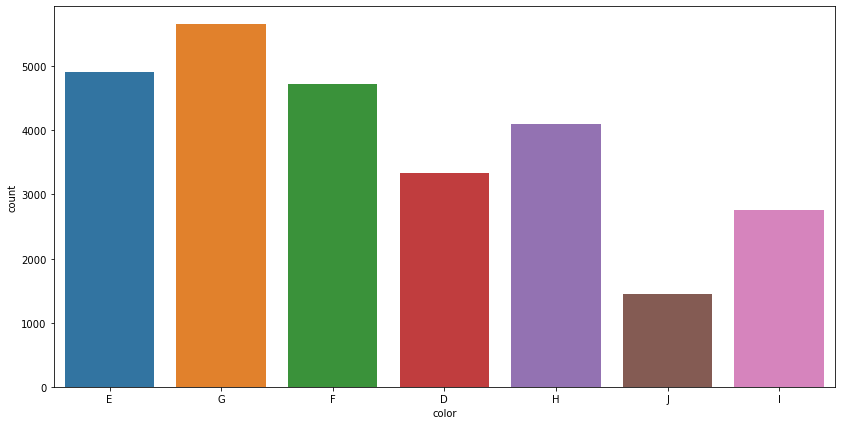

In [29]:
plt.figure(figsize=(14,7))
sns.countplot(cz_df["color"]);

In [30]:
cz_df["cut"].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

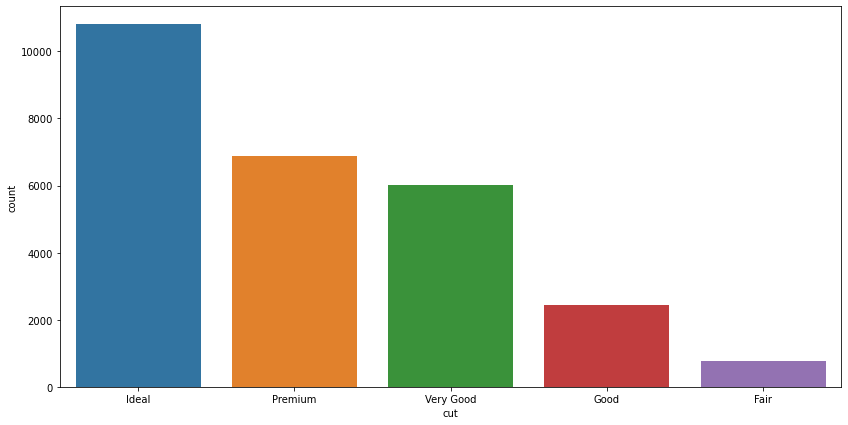

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(cz_df["cut"]);

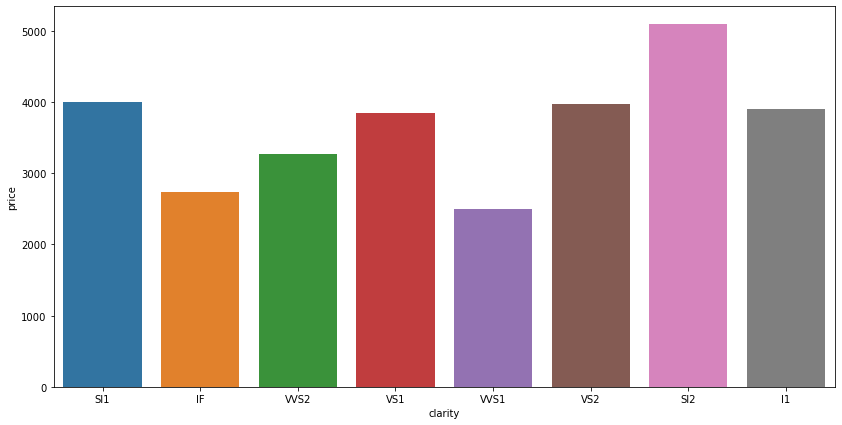

In [32]:
plt.figure(figsize=(14,7))
sns.barplot(x="clarity",y="price",data=cz_df,ci=False);

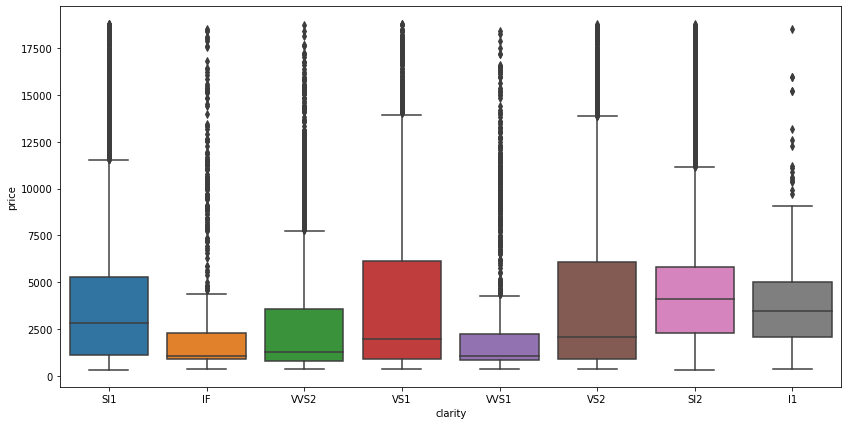

In [33]:
plt.figure(figsize=(14,7))
sns.boxplot(x="clarity",y="price",data=cz_df);

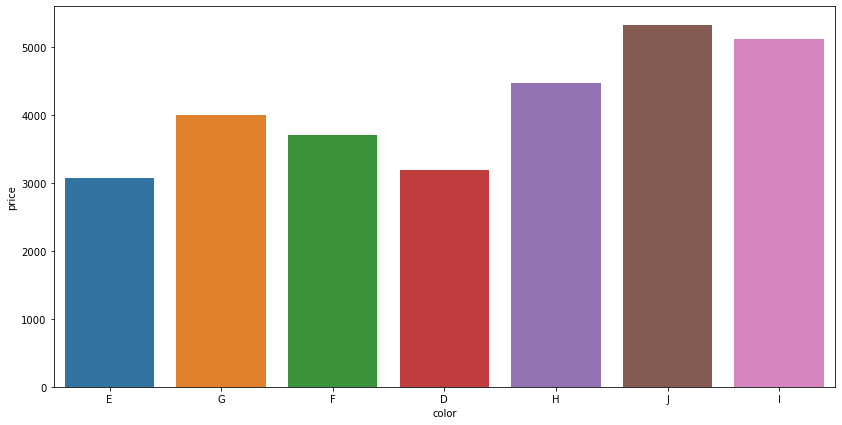

In [34]:
plt.figure(figsize=(14,7))
sns.barplot(x="color",y="price",data=cz_df,ci=False);

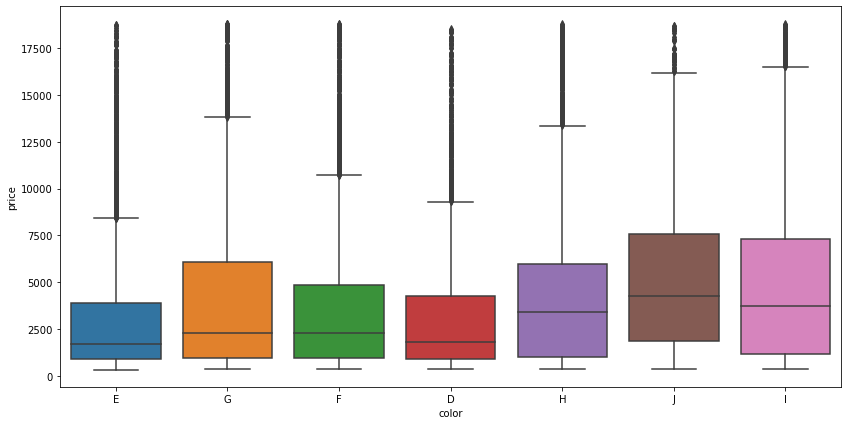

In [35]:
plt.figure(figsize=(14,7))
sns.boxplot(x="color",y="price",data=cz_df);

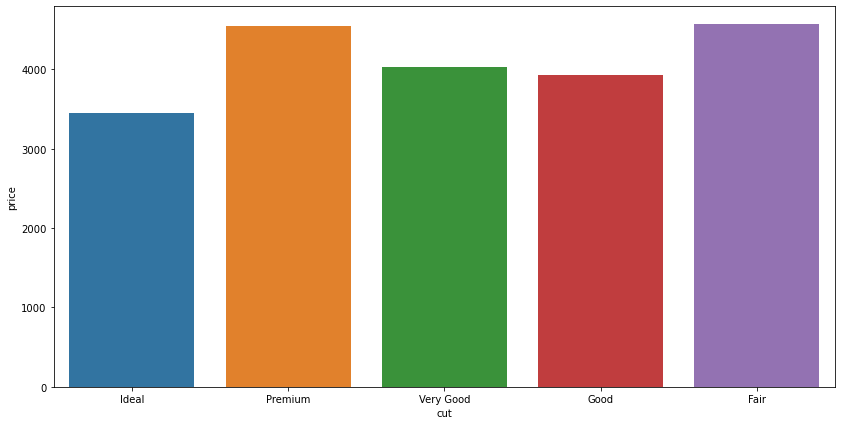

In [36]:
plt.figure(figsize=(14,7))
sns.barplot(x="cut",y="price",data=cz_df,ci=False);

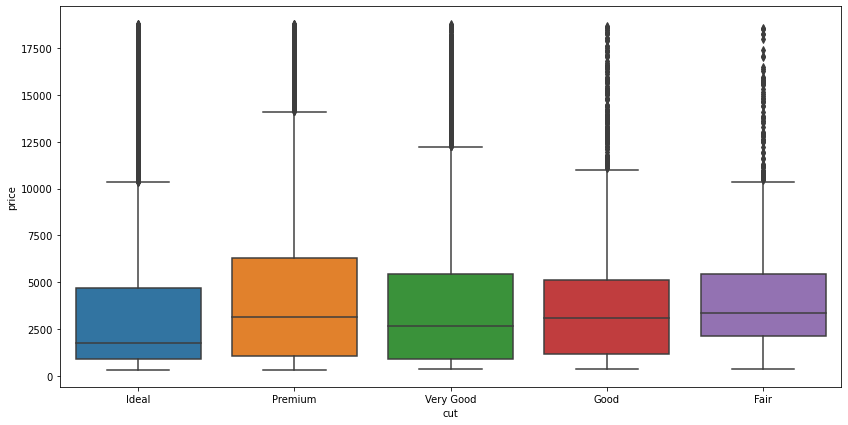

In [37]:
plt.figure(figsize=(14,7))
sns.boxplot(x="cut",y="price",data=cz_df);

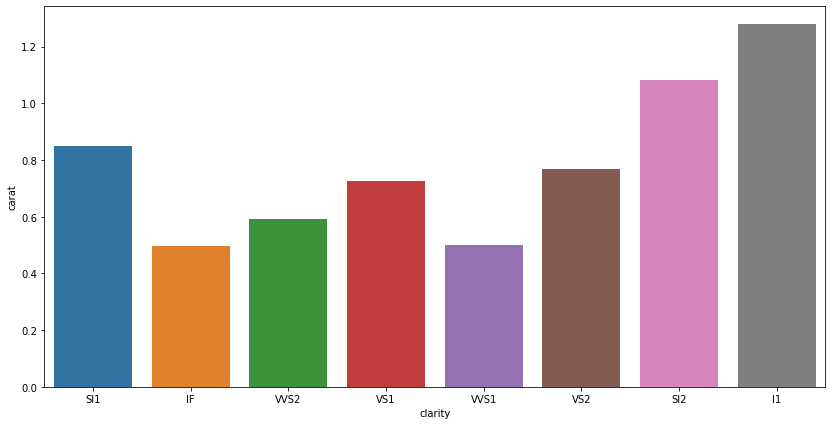

In [38]:
plt.figure(figsize=(14,7))
sns.barplot(x="clarity",y="carat",data=cz_df,ci=False);

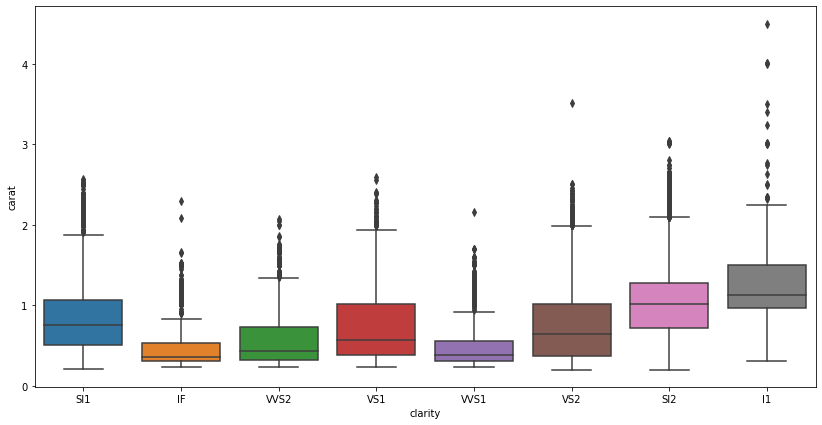

In [39]:
plt.figure(figsize=(14,7))
sns.boxplot(x="clarity",y="carat",data=cz_df);

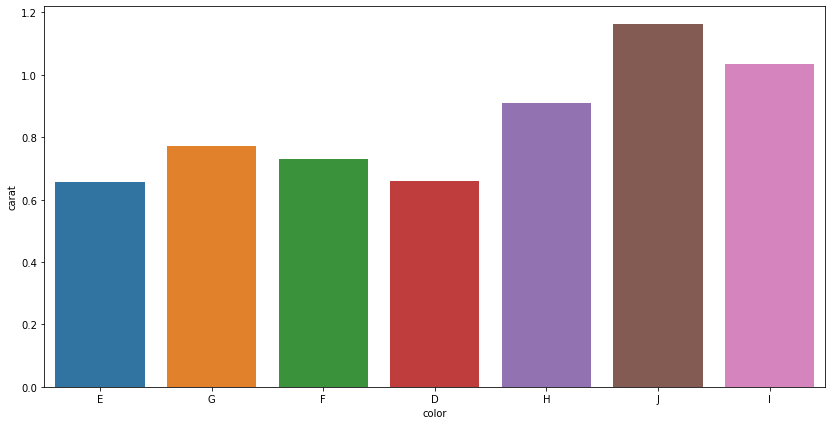

In [40]:
plt.figure(figsize=(14,7))
sns.barplot(x="color",y="carat",data=cz_df,ci=False);

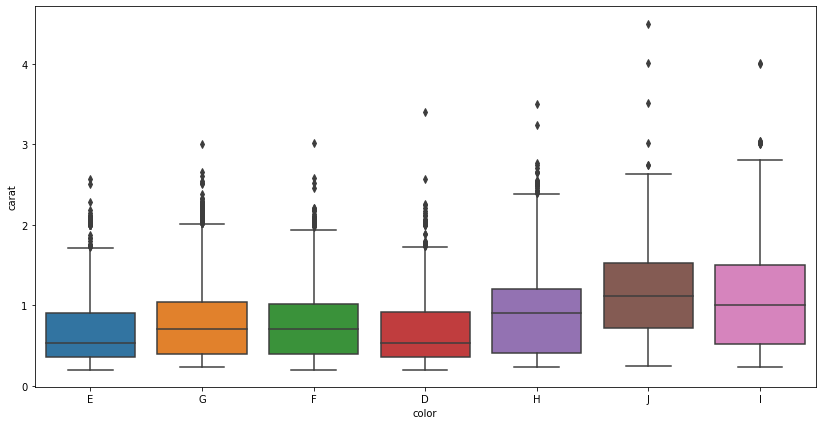

In [41]:
plt.figure(figsize=(14,7))
sns.boxplot(x="color",y="carat",data=cz_df);

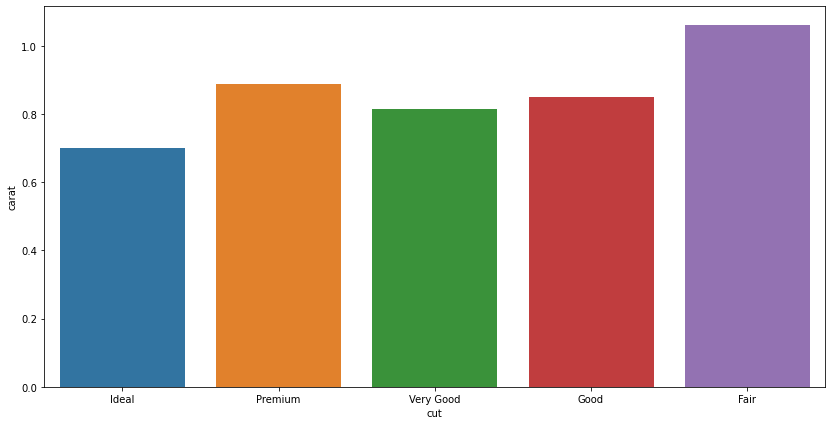

In [42]:
plt.figure(figsize=(14,7))
sns.barplot(x="cut",y="carat",data=cz_df,ci=False);

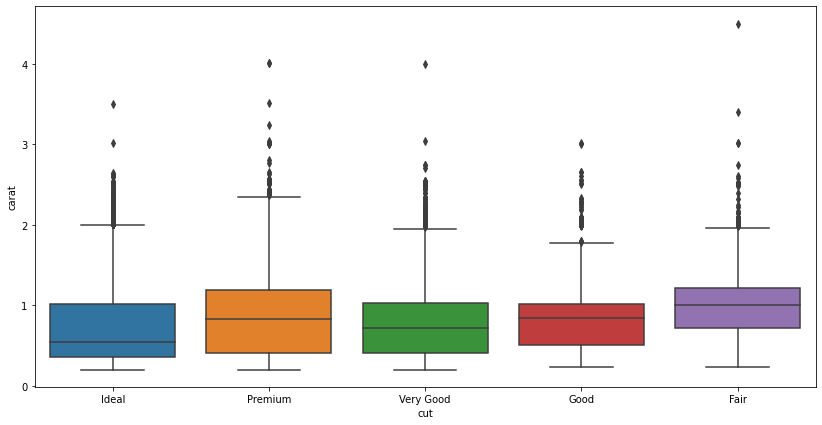

In [43]:
plt.figure(figsize=(14,7))
sns.boxplot(x="cut",y="carat",data=cz_df);

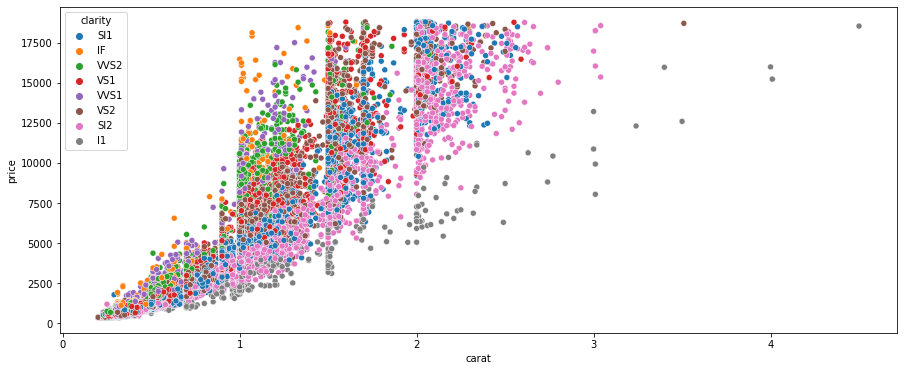

In [44]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="carat",y="price",data=cz_df,hue="clarity");

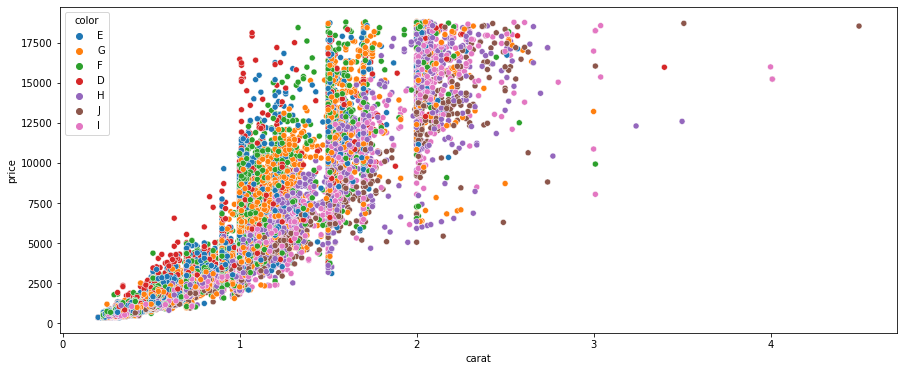

In [45]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="carat",y="price",data=cz_df,hue="color");

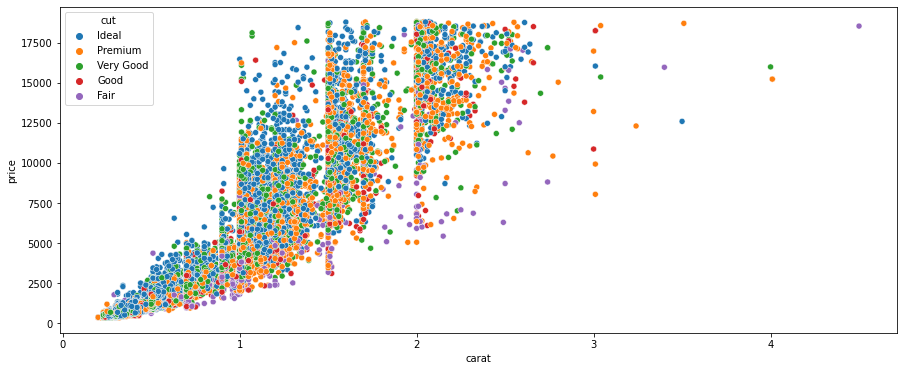

In [46]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="carat",y="price",data=cz_df,hue="cut");

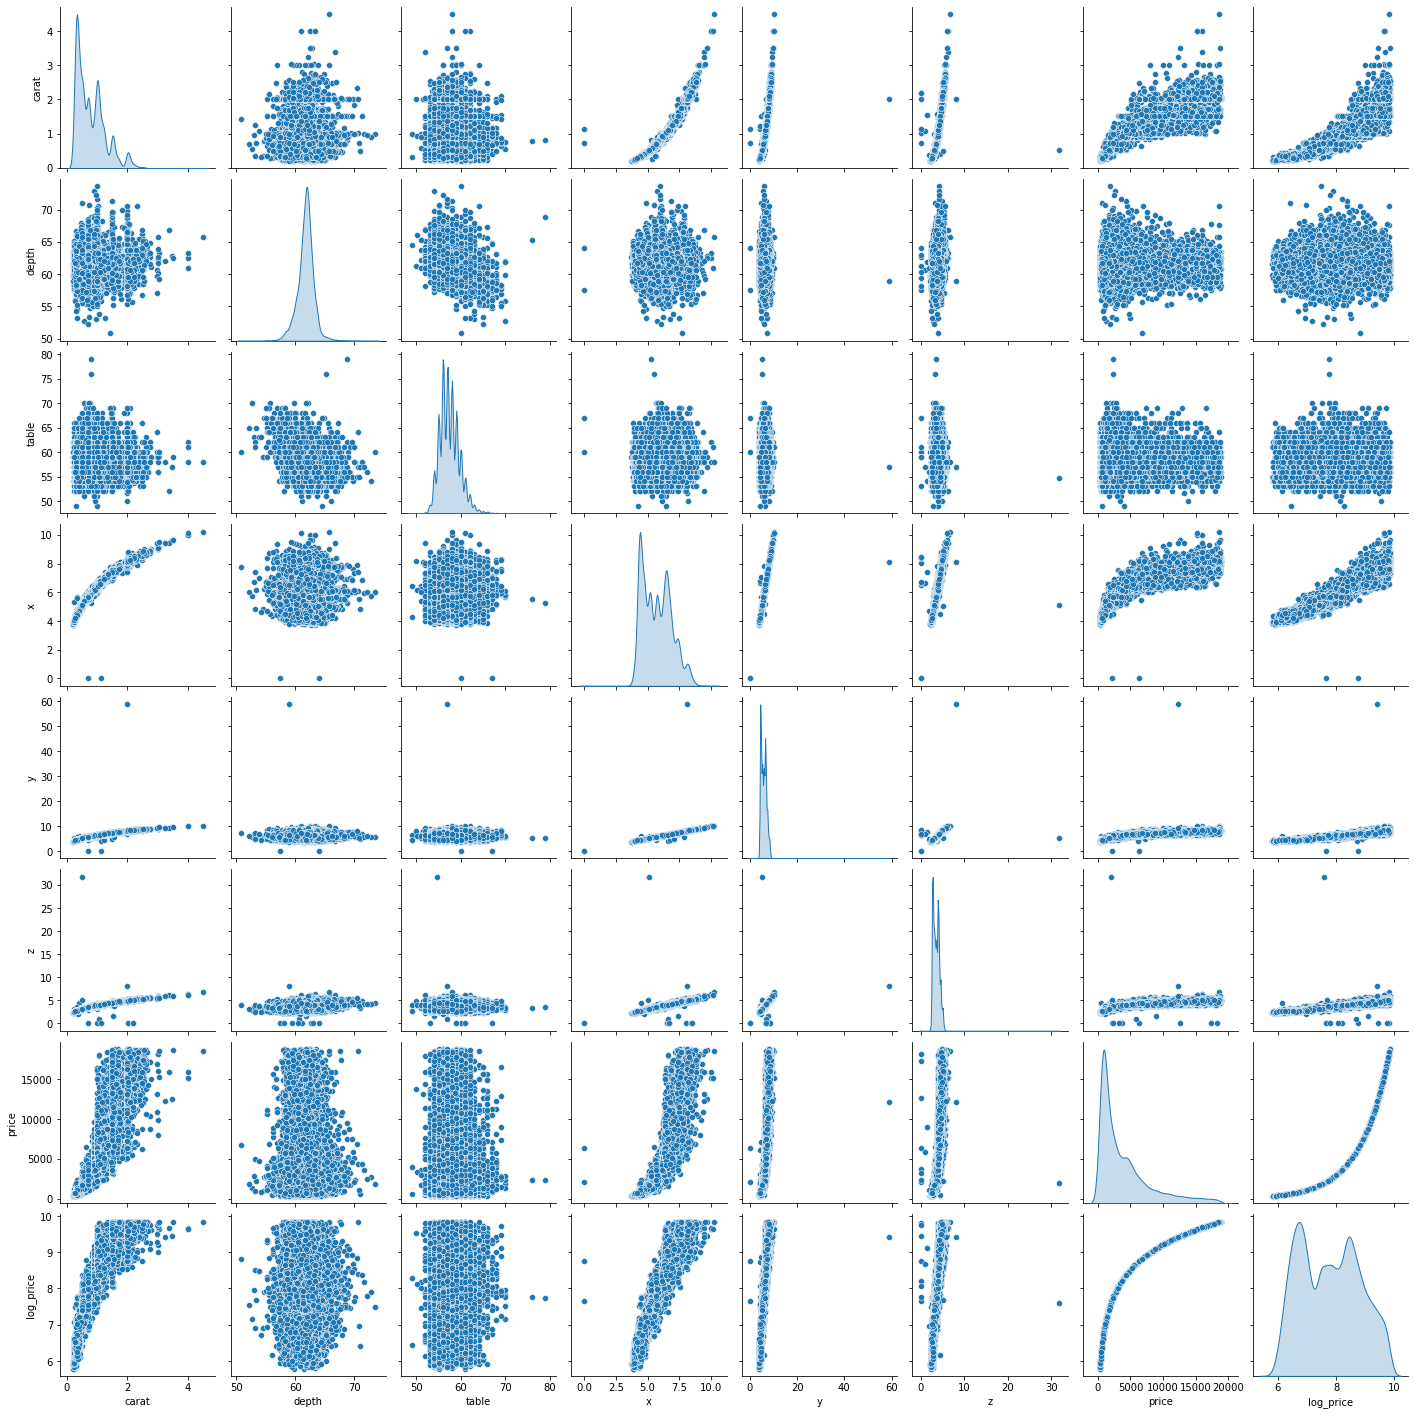

In [47]:
sns.pairplot(cz_df,diag_kind="kde")

We can see a linear relationship between carat, x, y and z variables. We can also see that most of the variables are multi-modal data. We can also see the linear relationship between carat and x,y and z variables. Also there is also a linear relationship between x,y and z variables.

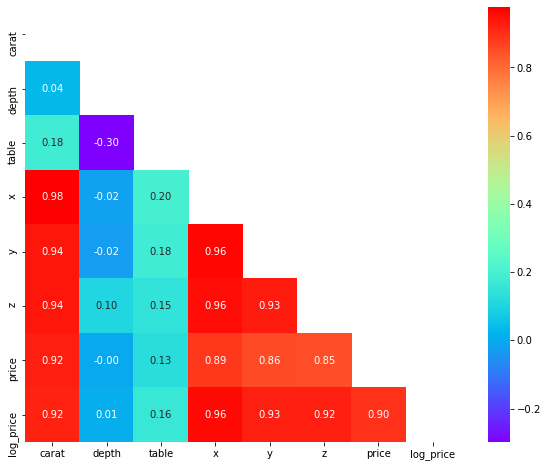

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(cz_df.corr(),square=True,annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(cz_df.corr()))
plt.show()

From the heatmap, we can see that the correlation between price and depth is 0.0 and price and table is 0.13. These are poor estimators. These variables will not help us in the regression model.

**1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.**

In [49]:
cz_df["depth"].fillna((cz_df["depth"].median()), inplace=True)

In [50]:
cz_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
x            0
y            0
z            0
price        0
log_price    0
dtype: int64

The null values have been filled with the median values, because there are outliers present in the dataset.

**When checking the statistical description of the dataset, we found that the x,y and z variables have a minimum value of "0". This is not possible, as these are the length, width and height of the cubic zirconia respectively. These should be checked why, and imputed if required.**

In [51]:
cz_df[cz_df["x"]==0]

carat   cut color clarity  depth  table    x    y    z  price  \
5822    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130   
17507   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381   

       log_price  
5822    7.664347  
17507   8.761237

In [52]:
cz_df[cz_df["y"]==0]

carat   cut color clarity  depth  table    x    y    z  price  \
5822    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130   
17507   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381   

       log_price  
5822    7.664347  
17507   8.761237

In [53]:
cz_df[cz_df["z"]==0]

carat      cut color clarity  depth  table     x     y    z  price  \
5822    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130   
6035    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207   
10828   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265   
12499   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631   
12690   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696   
17507   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381   
18195   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167   
23759   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383   

       log_price  
5822    7.664347  
6035    9.809616  
10828   9.756495  
12499   9.443989  
12690   8.215277  
17507   8.761237  
18195   8.060856  
23759   7.776535

**These 0 values for x,y and z do not make any sense. So we need to impute them**

In [54]:
cz_df["x"]=np.where(cz_df["x"]==0,cz_df["x"].median(),cz_df["x"])
cz_df["y"]=np.where(cz_df["y"]==0,cz_df["y"].median(),cz_df["y"])
cz_df["z"]=np.where(cz_df["z"]==0,cz_df["z"].median(),cz_df["z"])

Let us look at the boxplot again.

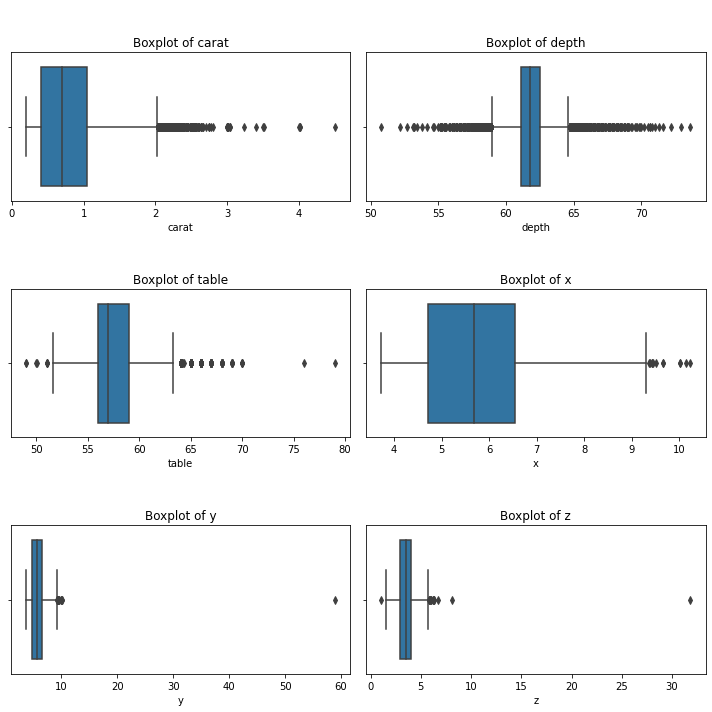

In [55]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(cz_df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

From the boxplot, we can see that variables, carat, depth, table, and x, have outliers, which can be accepted as they could be possibly true values. But for the variables, y and z, one of the point is very far from the other values. These points alone need to be treated. The rest of the outliers in the y and z variables are also possible values.

In [56]:
cz_df["y"]=np.where(cz_df["y"]>20,cz_df["y"].median(),cz_df["y"])
cz_df["z"]=np.where(cz_df["z"]>20,cz_df["z"].median(),cz_df["z"])

We can again look at the boxplot.

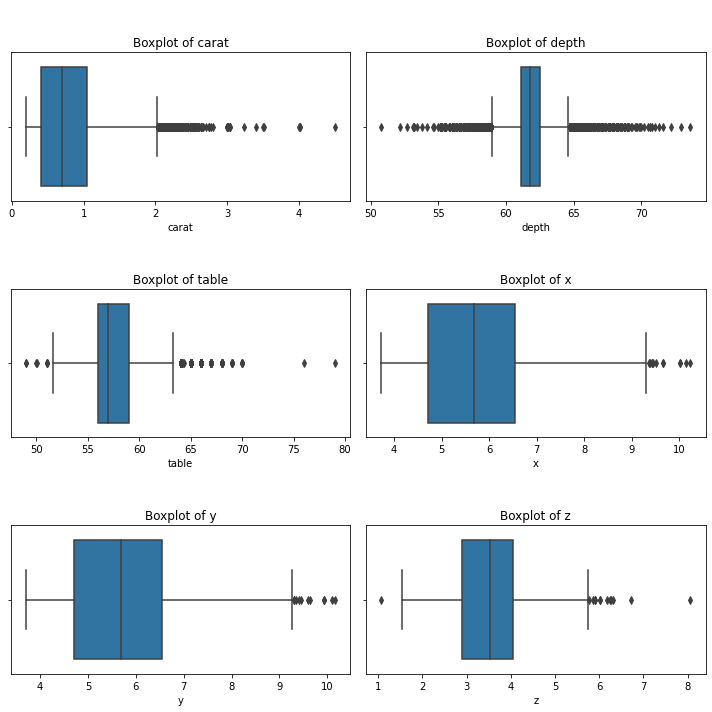

In [57]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(cz_df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [58]:
cz_df.describe().T

count         mean          std        min         25%  \
carat      26933.0     0.798010     0.477237    0.20000    0.400000   
depth      26933.0    61.746701     1.393875   50.80000   61.100000   
table      26933.0    57.455950     2.232156   49.00000   56.000000   
x          26933.0     5.729769     1.126285    3.73000    4.710000   
y          26933.0     5.731550     1.117994    3.71000    4.720000   
z          26933.0     3.537765     0.696400    1.07000    2.900000   
price      26933.0  3937.526120  4022.551862  326.00000  945.000000   
log_price  26933.0     7.782790     1.018867    5.78996    6.852243   

                   50%          75%           max  
carat         0.700000     1.050000      4.500000  
depth        61.800000    62.500000     73.600000  
table        57.000000    59.000000     79.000000  
x             5.690000     6.550000     10.230000  
y             5.700000     6.540000     10.160000  
z             3.520000     4.040000      8.060000  
price      2375.000000  5356.000000  18818.000000  
log_price     7.773174     8.586159      9.842622

Now let us look at the pairplot again

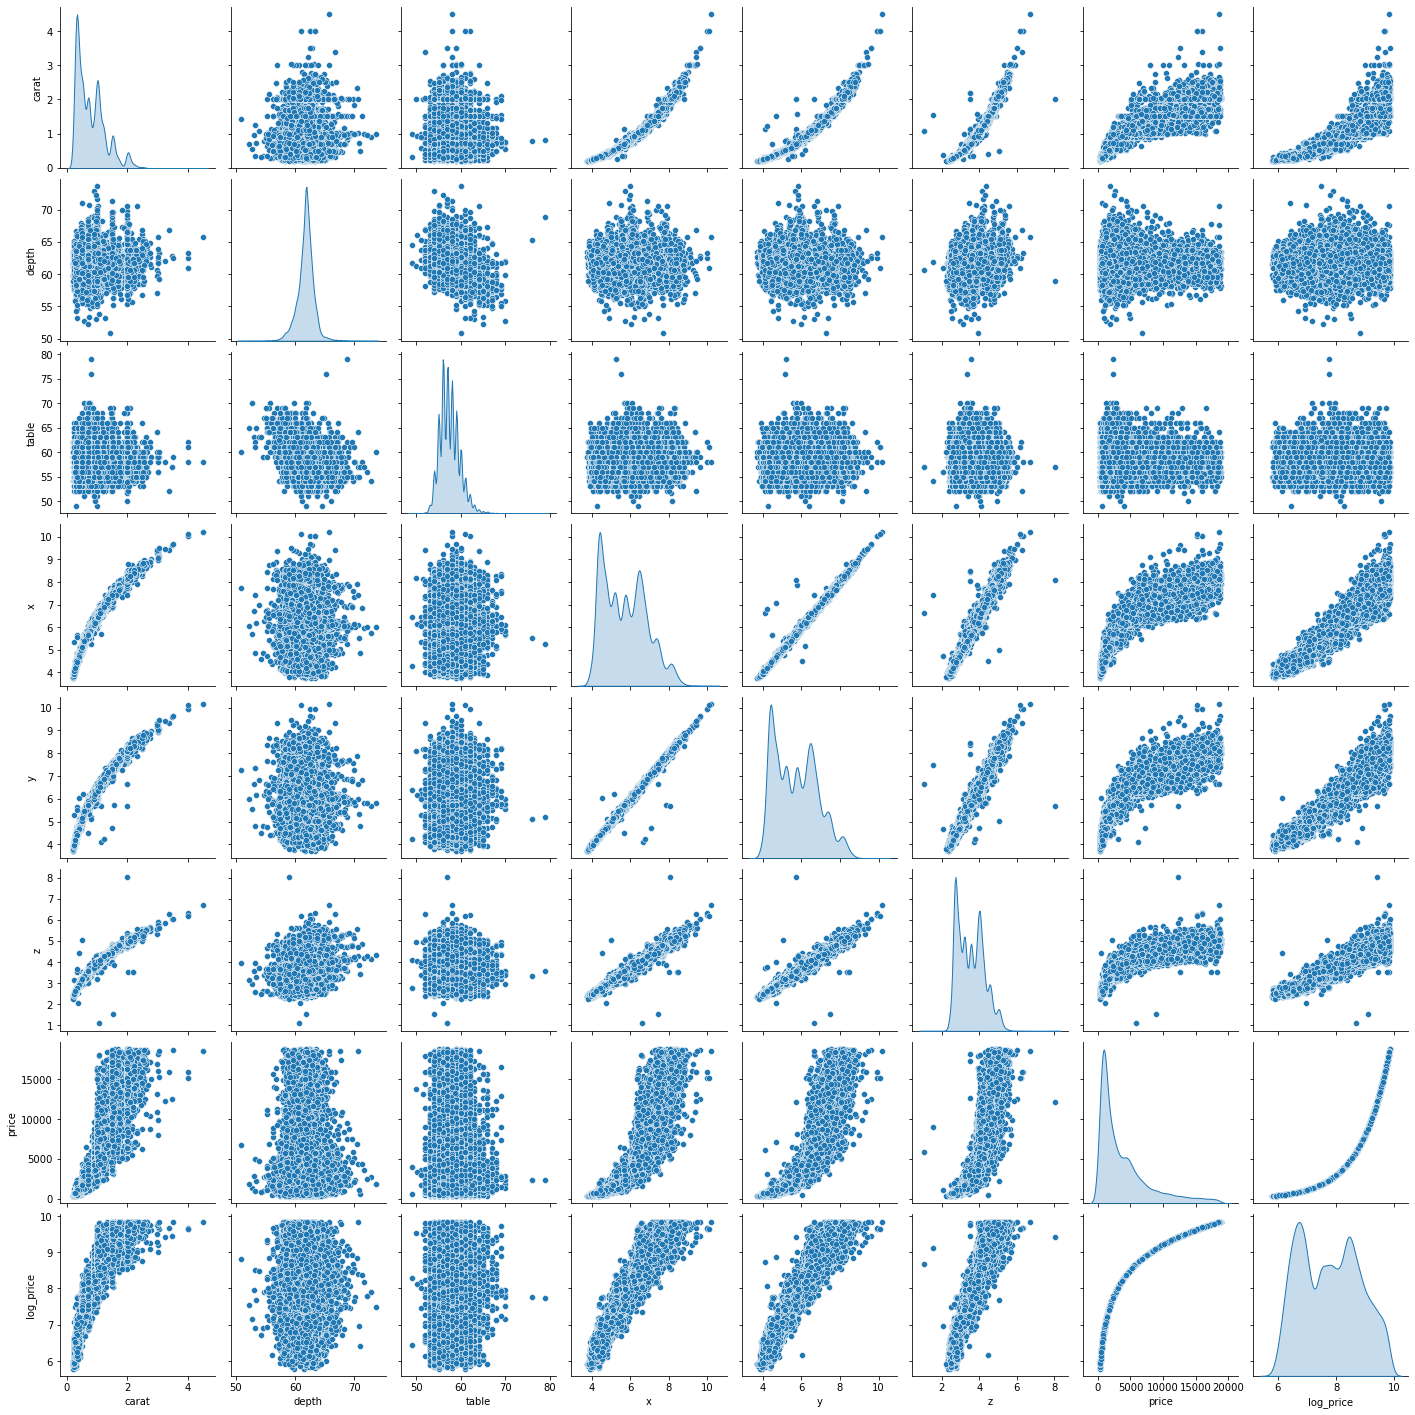

In [59]:
sns.pairplot(cz_df,diag_kind="kde")

Now, we can see a better relationship between x,y and z in the pairplot. We can also see that some of the variables do not have a linear relationship with price variables, like the depth and table variables. These variables could be redundant to our model building.

Let us also look at the histogram.

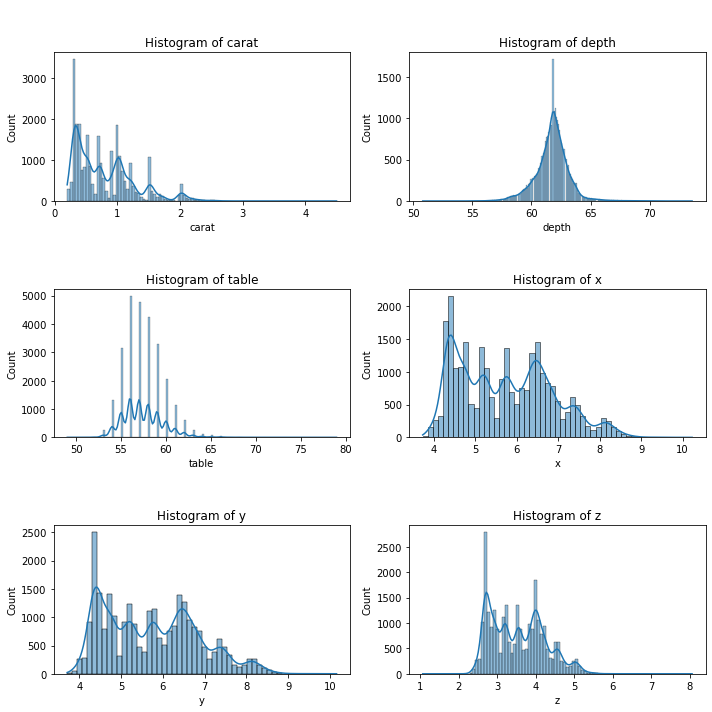

In [60]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.histplot(cz_df[feature_list[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list[i]))
    plt.tight_layout()

In [61]:
cz_df["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [62]:
cz_df["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [63]:
cz_df["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [64]:
cz_df["cut"].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [65]:
cz_df["color"].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [66]:
cz_df["clarity"].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

The "cut", "clarity" and the "color" variables are industry standards. So we cannot combine them.

**The x,y and z variables in the dataset, can be combined to provide the volume of the cubic zirconia. If we combine them, it will help us to reduce the correlation between the independent variables. It will help us avoid the curse of dimensionality.**

In [67]:
cz_df["volume"]=round(cz_df["x"]*cz_df["y"]*cz_df["z"],2)

In [68]:
cz_df.head(10)

carat        cut color clarity  depth  table     x     y     z  price  \
1    0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499   
2    0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984   
3    0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289   
4    0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082   
5    0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779   
6    1.02      Ideal     D     VS2   61.5   56.0  6.46  6.49  3.99   9502   
7    1.01       Good     H     SI1   63.7   60.0  6.35  6.30  4.03   4836   
8    0.50    Premium     E     SI1   61.5   62.0  5.09  5.06  3.12   1415   
9    1.21       Good     H     SI1   63.8   64.0  6.72  6.63  4.26   5407   
10   0.35      Ideal     F     VS2   60.5   57.0  4.52  4.60  2.76    706   

    log_price  volume  
1    6.214608   48.73  
2    6.892642   53.23  
3    8.746716  139.73  
4    6.987490   68.48  
5    6.659294   51.07  
6    9.159363  167.28  
7    8.484050  161.22  
8    7.255591   80.36  
9    8.595635  189.80  
10   6.561031   57.39

Let us now check how the volume is related to the price.

<AxesSubplot:xlabel='volume', ylabel='price'>

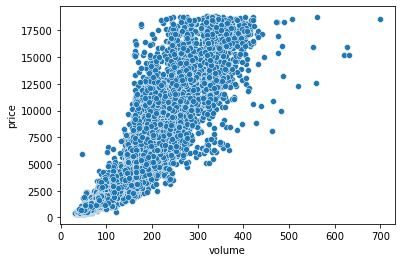

In [69]:
sns.scatterplot(data = cz_df, x="volume",y="price")

From this, we can see clearly that the price increases as the volume of the cubic zirconia increases.

<AxesSubplot:xlabel='volume', ylabel='log_price'>

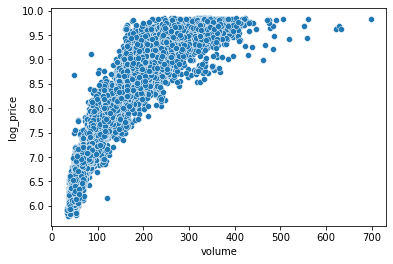

In [70]:
sns.scatterplot(data = cz_df, x="volume",y="log_price")

**1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.**

In [71]:
cz_df["cut"]=np.where(cz_df["cut"]=="Fair",0,cz_df["cut"])
cz_df["cut"]=np.where(cz_df["cut"]=="Good",1,cz_df["cut"])
cz_df["cut"]=np.where(cz_df["cut"]=="Very Good",2,cz_df["cut"])
cz_df["cut"]=np.where(cz_df["cut"]=="Premium",3,cz_df["cut"])
cz_df["cut"]=np.where(cz_df["cut"]=="Ideal",4,cz_df["cut"])

In [72]:
cz_df["color"]=np.where(cz_df["color"]=="D",0,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="E",1,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="F",2,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="G",3,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="H",4,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="I",5,cz_df["color"])
cz_df["color"]=np.where(cz_df["color"]=="J",6,cz_df["color"])

In [73]:
cz_df["clarity"]=np.where(cz_df["clarity"]=="IF",0,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="VVS1",1,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="VVS2",2,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="VS1",3,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="VS2",4,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="SI1",5,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="SI2",6,cz_df["clarity"])
cz_df["clarity"]=np.where(cz_df["clarity"]=="I1",7,cz_df["clarity"])

In [74]:
cz_df["cut"].value_counts()

4    10805
3     6886
2     6027
1     2435
0      780
Name: cut, dtype: int64

In [75]:
cz_df["color"].value_counts()

3    5653
1    4916
2    4723
4    4095
0    3341
5    2765
6    1440
Name: color, dtype: int64

In [76]:
cz_df["clarity"].value_counts()

5    6565
4    6093
6    4564
3    4087
2    2530
1    1839
0     891
7     364
Name: clarity, dtype: int64

In [77]:
cz_df.head(15)

carat cut color clarity  depth  table     x     y     z  price  log_price  \
1    0.30   4     1       5   62.1   58.0  4.27  4.29  2.66    499   6.214608   
2    0.33   3     3       0   60.8   58.0  4.42  4.46  2.70    984   6.892642   
3    0.90   2     1       2   62.2   60.0  6.04  6.12  3.78   6289   8.746716   
4    0.42   4     2       3   61.6   56.0  4.82  4.80  2.96   1082   6.987490   
5    0.31   4     2       1   60.4   59.0  4.35  4.43  2.65    779   6.659294   
6    1.02   4     0       4   61.5   56.0  6.46  6.49  3.99   9502   9.159363   
7    1.01   1     4       5   63.7   60.0  6.35  6.30  4.03   4836   8.484050   
8    0.50   3     1       5   61.5   62.0  5.09  5.06  3.12   1415   7.255591   
9    1.21   1     4       5   63.8   64.0  6.72  6.63  4.26   5407   8.595635   
10   0.35   4     2       4   60.5   57.0  4.52  4.60  2.76    706   6.561031   
11   0.32   4     1       4   61.6   56.0  4.40  4.43  2.72    637   6.458338   
12   1.10   3     0       5   60.7   55.0  6.74  6.71  4.08   6468   8.774777   
13   0.50   1     1       3   61.1   58.2  5.08  5.12  3.11   1932   7.566828   
14   0.71   4     0       6   61.6   55.0  5.74  5.76  3.54   2767   7.925880   
15   1.50   0     3       4   66.2   53.0  7.12  7.08  4.70  10644   9.272846   

    volume  
1    48.73  
2    53.23  
3   139.73  
4    68.48  
5    51.07  
6   167.28  
7   161.22  
8    80.36  
9   189.80  
10   57.39  
11   53.02  
12  184.52  
13   80.89  
14  117.04  
15  236.93

In [78]:
cz_df.dtypes

carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
x            float64
y            float64
z            float64
price          int64
log_price    float64
volume       float64
dtype: object

The columns are still stored as object. Let us change them to ineger values.

In [79]:
cz_df["cut"]=cz_df["cut"].astype(str).astype(int)
cz_df["color"]=cz_df["color"].astype(str).astype(int)
cz_df["clarity"]=cz_df["clarity"].astype(str).astype(int)

In [80]:
cz_df.dtypes

carat        float64
cut            int32
color          int32
clarity        int32
depth        float64
table        float64
x            float64
y            float64
z            float64
price          int64
log_price    float64
volume       float64
dtype: object

Now, all of our variables are stored as integer or float values

In [81]:
cz_df.describe().T

count         mean          std        min         25%  \
carat      26933.0     0.798010     0.477237    0.20000    0.400000   
cut        26933.0     2.909702     1.113165    0.00000    2.000000   
color      26933.0     2.605206     1.705883    0.00000    1.000000   
clarity    26933.0     3.946423     1.646749    0.00000    3.000000   
depth      26933.0    61.746701     1.393875   50.80000   61.100000   
table      26933.0    57.455950     2.232156   49.00000   56.000000   
x          26933.0     5.729769     1.126285    3.73000    4.710000   
y          26933.0     5.731550     1.117994    3.71000    4.720000   
z          26933.0     3.537765     0.696400    1.07000    2.900000   
price      26933.0  3937.526120  4022.551862  326.00000  945.000000   
log_price  26933.0     7.782790     1.018867    5.78996    6.852243   
volume     26933.0   129.837107    76.971307   32.24000   64.780000   

                   50%          75%           max  
carat         0.700000     1.050000      4.500000  
cut           3.000000     4.000000      4.000000  
color         3.000000     4.000000      6.000000  
clarity       4.000000     5.000000      7.000000  
depth        61.800000    62.500000     73.600000  
table        57.000000    59.000000     79.000000  
x             5.690000     6.550000     10.230000  
y             5.700000     6.540000     10.160000  
z             3.520000     4.040000      8.060000  
price      2375.000000  5356.000000  18818.000000  
log_price     7.773174     8.586159      9.842622  
volume      114.640000   171.360000    698.460000

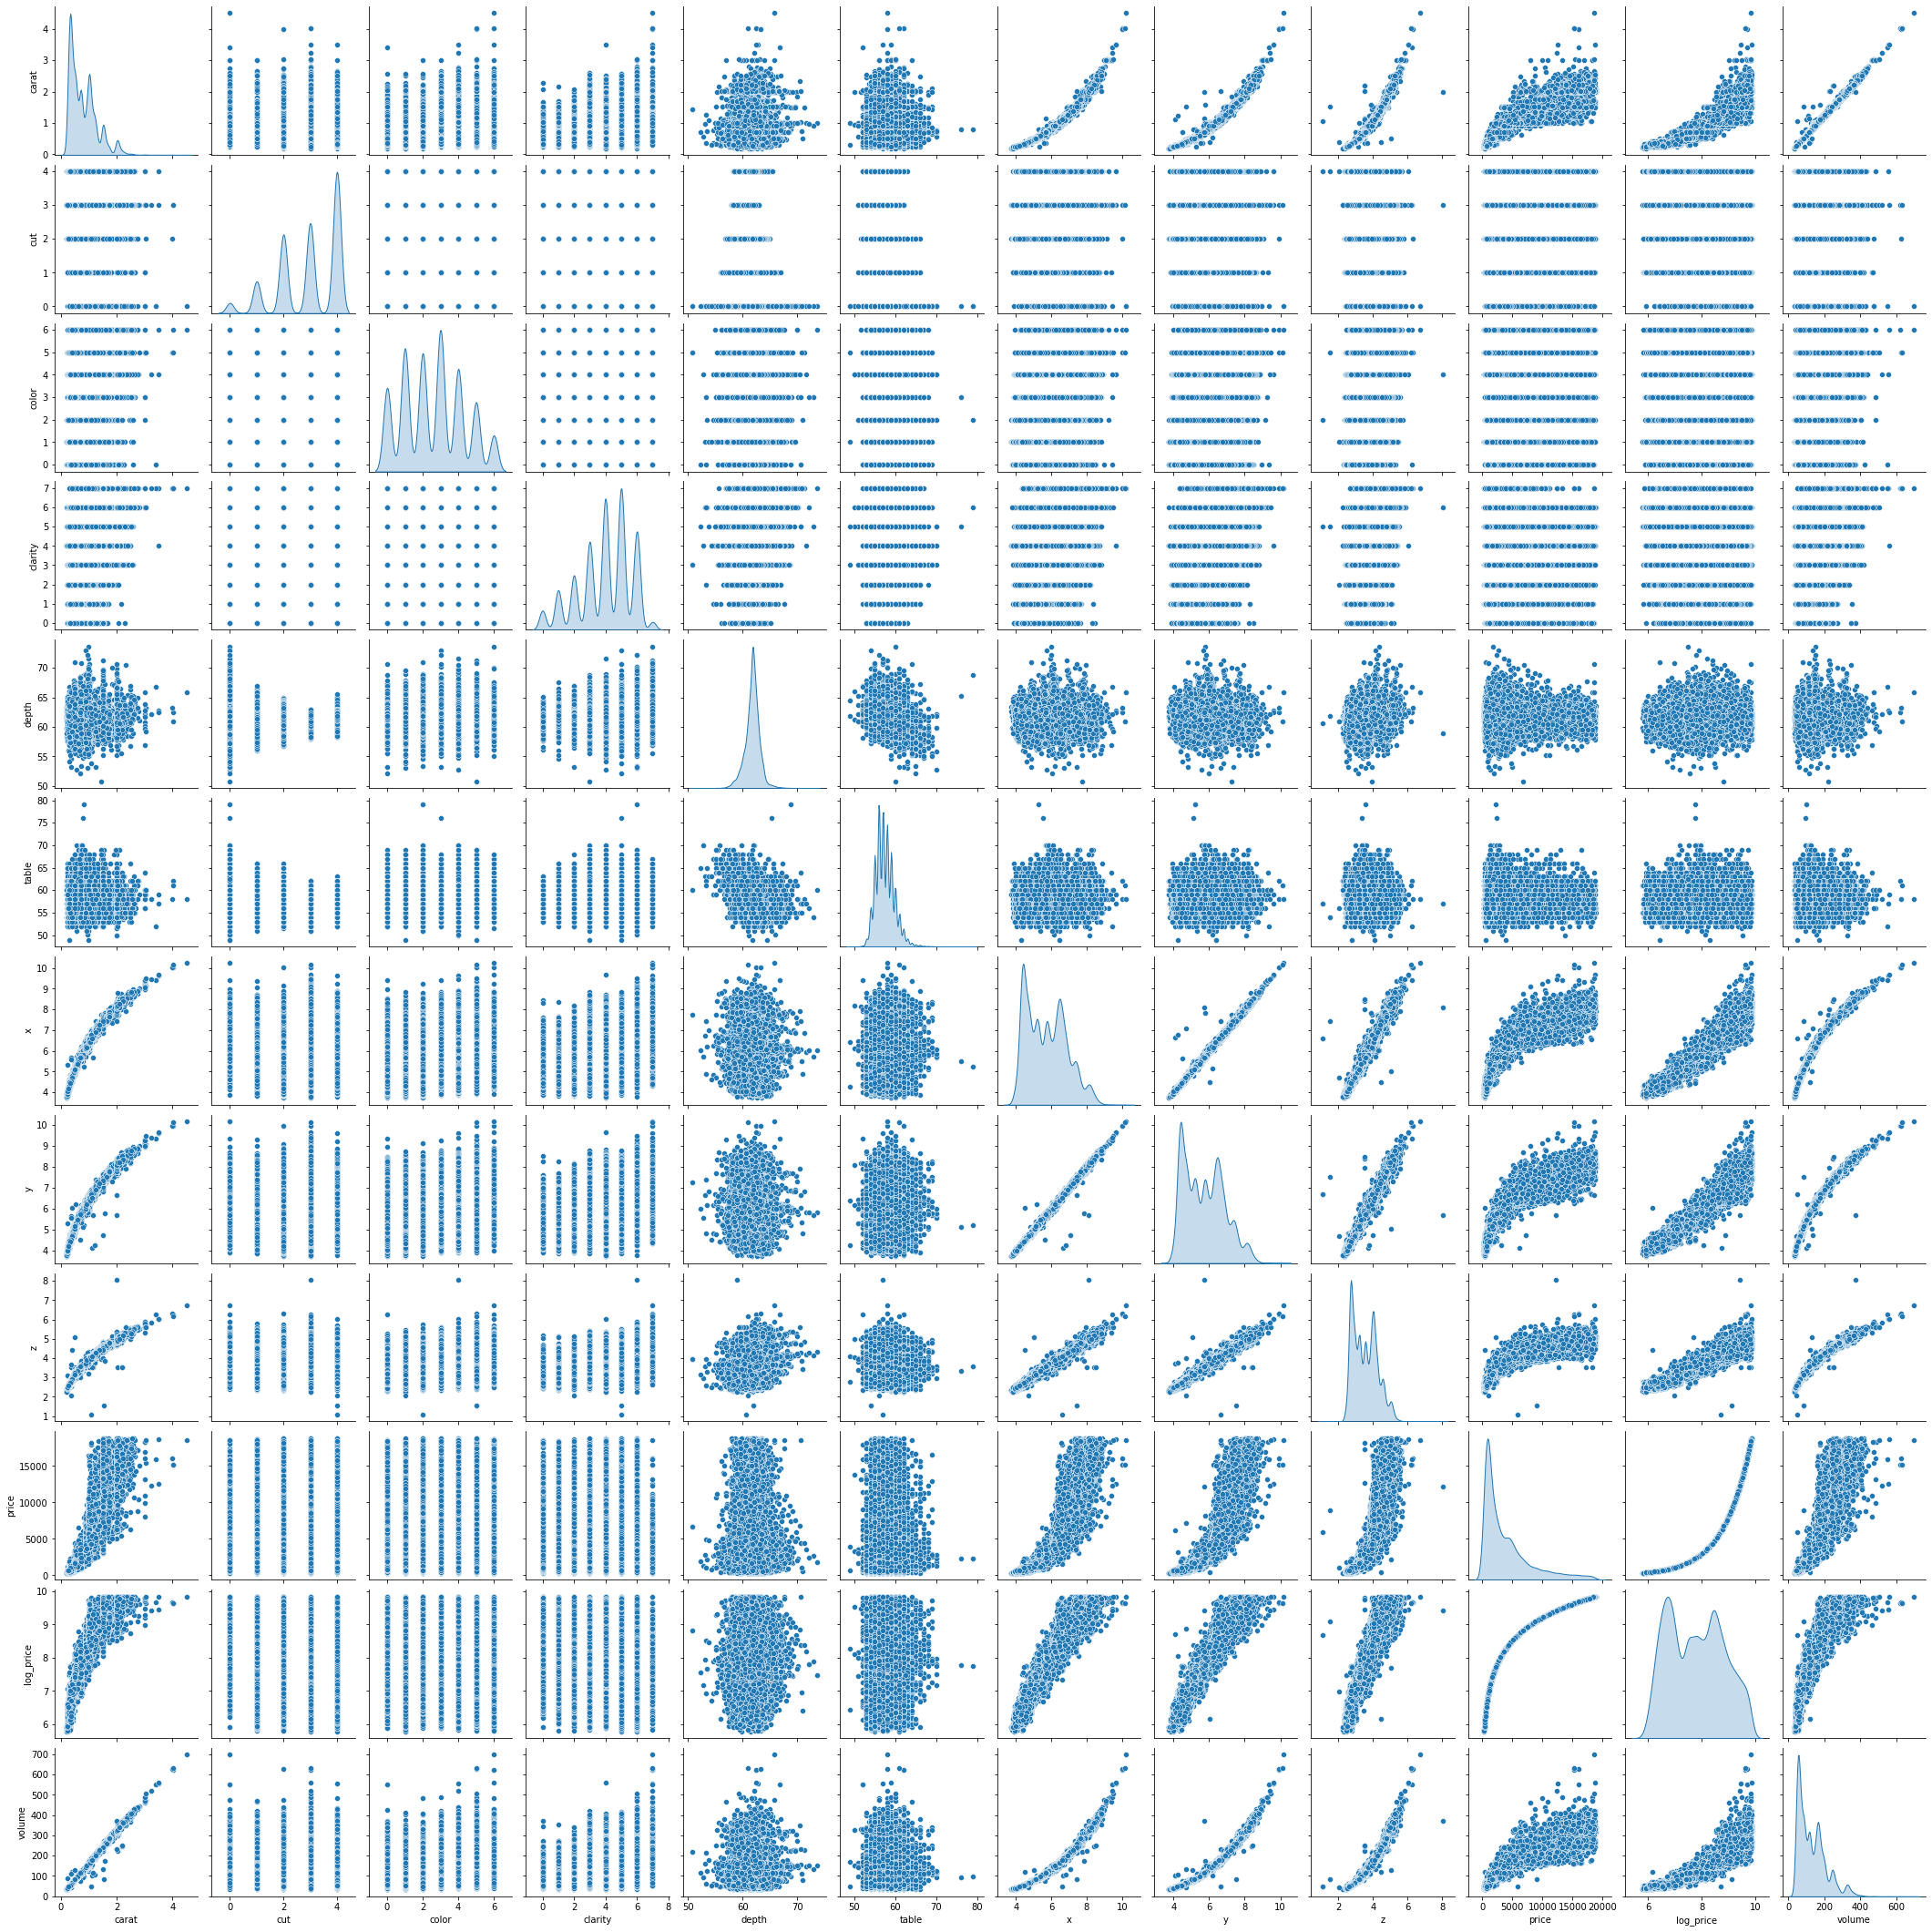

In [82]:
sns.pairplot(cz_df,diag_kind="kde")

We can also see that the price increases as the cut, clarity and color increases from one level to another.

In [83]:
#variation inflation factor for checking correlations among variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
#defining a function for checking Variation Inflation factor. 
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [85]:
X = cz_df[["carat","cut","clarity","depth","table","x","y","z"]]
checkvif(X)

  Variables           VIF
0     carat     88.528023
1       cut     10.247880
2   clarity      8.162391
3     depth   1029.339701
4     table    800.770191
5         x  10872.988685
6         y   8837.391668
7         z   3121.265621


Removing x variable, which has the highest value of correlation.

In [86]:
X = cz_df[["carat","cut","clarity","depth","table","y","z"]]
checkvif(X)

  Variables          VIF
0     carat    87.303744
1       cut     9.779095
2   clarity     8.086372
3     depth   951.896219
4     table   710.444815
5         y  2324.222035
6         z  2682.191765


Now, let us remove the z value which has the highest value of the above variables.

In [87]:
X = cz_df[["carat","cut","clarity","depth","table","y"]]
checkvif(X)

  Variables         VIF
0     carat   74.304748
1       cut    8.547017
2   clarity    8.014794
3     depth  480.272321
4     table  496.803665
5         y  543.972316


Now we can see that the values of VIF for all the variables have reduced for almost all the variables. But all of the values are still very much more than 5. So now let us remove the y variable, which has the highest VIF value in the above variables.

In [88]:
X = cz_df[["carat","cut","clarity","depth","table"]]
checkvif(X)

  Variables         VIF
0     carat    4.413427
1       cut    8.153572
2   clarity    7.907677
3     depth  442.977363
4     table  420.685935


We can see that with the removal of the y variable, the variable carat has a vif value less than 5. Let us remove the depth variable.

In [89]:
X = cz_df[["carat","cut","clarity","table"]]
checkvif(X)

  Variables        VIF
0     carat   4.403803
1       cut   7.310845
2   clarity   7.883217
3     table  16.307153


Now, let us remove the table variable.

In [90]:
X = cz_df[["carat","cut","clarity"]]
checkvif(X)

  Variables       VIF
0     carat  4.053025
1       cut  3.468804
2   clarity  5.378350


In [91]:
X = cz_df[["carat","cut"]]
checkvif(X)

  Variables      VIF
0     carat  2.51308
1       cut  2.51308


We see that only when we remove most of the variables, we are left with only 2 variables, which have lesser correlation among them.

So it would be unwise to continue with just the two variable. Instead we can look over the multi-collinearity rule, and proceed with the regression, with all the variables.

We can see that all the variables have a vif value more than 5 except color variables. Therefore, we can conclude that all the variables have a correlation among them.

In [92]:
#importing library for train test splitting
from sklearn.model_selection import train_test_split

Initially let us make the model without the volume column.

In [93]:
# Now let us drop the target column in X and add it in Y
x=cz_df.drop(["log_price","volume","price"],axis=1)
y=cz_df[("log_price")]

In [94]:
x.head()

carat  cut  color  clarity  depth  table     x     y     z
1   0.30    4      1        5   62.1   58.0  4.27  4.29  2.66
2   0.33    3      3        0   60.8   58.0  4.42  4.46  2.70
3   0.90    2      1        2   62.2   60.0  6.04  6.12  3.78
4   0.42    4      2        3   61.6   56.0  4.82  4.80  2.96
5   0.31    4      2        1   60.4   59.0  4.35  4.43  2.65

In [95]:
y.head()

1    6.214608
2    6.892642
3    8.746716
4    6.987490
5    6.659294
Name: log_price, dtype: float64

In [96]:
#Now let us perform the train and test split
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=0,)

In [97]:
x_train.head()

carat  cut  color  clarity  depth  table     x     y     z
8748    1.19    4      1        6   60.2   57.0  6.84  6.87  4.13
13822   0.36    4      0        4   61.0   56.0  4.63  4.59  2.81
13583   1.20    1      5        5   63.1   58.0  6.66  6.72  4.22
9953    0.24    2      1        1   60.7   60.0  4.01  4.06  2.45
25531   0.50    2      2        2   61.8   56.0  5.11  5.15  3.17

In [98]:
x_train_b = x_train.copy()
x_test_b = x_test.copy()

In [99]:
train_labels.head()

8748     8.651374
13822    6.998510
13583    8.466531
9953     6.186209
25531    7.627057
Name: log_price, dtype: float64

In [100]:
#importing linear regression model from sklearn library
from sklearn.linear_model import LinearRegression

In [101]:
#Building the first instance of linear regression model
regression_model_1=LinearRegression()

In [102]:
#fitting the model with the training data
regression_model_1.fit(x_train,train_labels)

LinearRegression()

In [103]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[idx]))

The coefficient for carat is -1.09014702987864
The coefficient for cut is 0.025837490147976438
The coefficient for color is -0.07800515539391302
The coefficient for clarity is -0.12097025081862886
The coefficient for depth is 0.04451179461234733
The coefficient for table is 0.00920961279605248
The coefficient for x is 0.8065299321929537
The coefficient for y is 0.43272866506823
The coefficient for z is 0.30385797552104044


In [104]:
#Intercept value
print("The intercept value for our model is",regression_model_1.intercept_)

The intercept value for our model is -2.1969570657519615


In [105]:
# R square on training data
regression_model_1.score(x_train, train_labels)

0.9792659236687614

In [106]:
# R square on testing data
regression_model_1.score(x_test, test_labels)

0.9794694521937579

In [107]:
#predicting training labels
predicted_train_1=regression_model_1.predict(x_train)

In [108]:
x_train

carat  cut  color  clarity  depth  table     x     y     z
8748    1.19    4      1        6   60.2   57.0  6.84  6.87  4.13
13822   0.36    4      0        4   61.0   56.0  4.63  4.59  2.81
13583   1.20    1      5        5   63.1   58.0  6.66  6.72  4.22
9953    0.24    2      1        1   60.7   60.0  4.01  4.06  2.45
25531   0.50    2      2        2   61.8   56.0  5.11  5.15  3.17
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
13132   0.23    2      2        4   63.4   56.0  3.84  3.89  2.45
19667   0.34    4      3        4   62.0   54.0  4.50  4.47  2.78
9851    1.07    3      2        6   58.2   58.0  6.79  6.72  3.93
10807   0.53    2      4        5   61.7   60.0  5.17  5.21  3.20
2733    1.24    2      3        5   61.8   58.0  6.90  6.96  4.28

[18853 rows x 9 columns]

In [109]:
from sklearn import metrics

In [110]:
#RMSE on Training data
np.sqrt(metrics.mean_squared_error(train_labels,predicted_train_1))

0.14654201298256453

In [111]:
#RMSE on Testing data
predicted_test_1=regression_model_1.predict(x_test)
np.sqrt(metrics.mean_squared_error(test_labels,predicted_test_1))

0.14636803140673438

MSE value

In [112]:
#Training data
metrics.mean_squared_error(train_labels,predicted_train_1)

0.021474561568982108

In [113]:
#Testing data
metrics.mean_squared_error(test_labels,predicted_test_1)

0.02142360061788278

Let us now try the model with statsmodel library

In [114]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train, train_labels], axis=1)
data_test=pd.concat([x_test,test_labels],axis=1)
data_train.head()

carat  cut  color  clarity  depth  table     x     y     z  log_price
8748    1.19    4      1        6   60.2   57.0  6.84  6.87  4.13   8.651374
13822   0.36    4      0        4   61.0   56.0  4.63  4.59  2.81   6.998510
13583   1.20    1      5        5   63.1   58.0  6.66  6.72  4.22   8.466531
9953    0.24    2      1        1   60.7   60.0  4.01  4.06  2.45   6.186209
25531   0.50    2      2        2   61.8   56.0  5.11  5.15  3.17   7.627057

In [115]:
formula= "log_price ~ carat + cut + color + clarity + depth + table + x + y + z"

In [116]:
#importing necessary library
import statsmodels.formula.api as smf

In [117]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= formula, data = data_train).fit()
lm1.params

Intercept   -2.196957
carat       -1.090147
cut          0.025837
color       -0.078005
clarity     -0.120970
depth        0.044512
table        0.009210
x            0.806530
y            0.432729
z            0.303858
dtype: float64

In [118]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 9.888e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:53:48   Log-Likelihood:                 9454.9
No. Observations:               18853   AIC:                        -1.889e+04
Df Residuals:                   18843   BIC:                        -1.881e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1970      0.134    -16.439      0.0

In [119]:
x_train_b["price"]=log_transformer.inverse_transform(train_labels)
x_train_b["Price_pred"]=log_transformer.inverse_transform(predicted_train_1)
x_train_b.head(15)

carat  cut  color  clarity  depth  table     x     y     z    price  \
8748    1.19    4      1        6   60.2   57.0  6.84  6.87  4.13   5718.0   
13822   0.36    4      0        4   61.0   56.0  4.63  4.59  2.81   1095.0   
13583   1.20    1      5        5   63.1   58.0  6.66  6.72  4.22   4753.0   
9953    0.24    2      1        1   60.7   60.0  4.01  4.06  2.45    486.0   
25531   0.50    2      2        2   61.8   56.0  5.11  5.15  3.17   2053.0   
2449    1.20    2      4        4   63.3   59.0  6.78  6.74  4.28   6834.0   
16453   0.98    0      3        7   67.3   60.0  6.17  6.11  4.14   1933.0   
2783    1.20    4      5        7   61.9   56.0  6.82  6.85  4.23   3506.0   
7345    0.33    3      3        1   61.5   59.0  4.42  4.46  2.73    811.0   
7510    1.04    4      3        2   62.1   55.1  6.50  6.51  4.04   8013.0   
9661    0.70    0      1        6   65.0   54.0  5.56  5.52  3.60   2601.0   
26851   0.30    4      4        3   62.5   56.0  4.24  4.27  2.66    527.0   
13181   0.32    4      2        2   61.2   55.0  4.43  4.46  2.72    801.0   
16326   0.40    4      1        1   61.7   57.0  4.70  4.74  2.91   1334.0   
3074    2.02    2      4        4   61.5   59.0  8.08  8.21  5.01  17888.0   

         Price_pred  
8748    6337.840271  
13822    930.122054  
13583   4584.266410  
9953     592.330864  
25531   1792.579946  
2449    6614.238057  
16453   3230.350784  
2783    4369.754286  
7345     872.208160  
7510    7012.226283  
9661    1985.361832  
26851    532.638746  
13181    828.516462  
16326   1434.735221  
3074   16803.701402

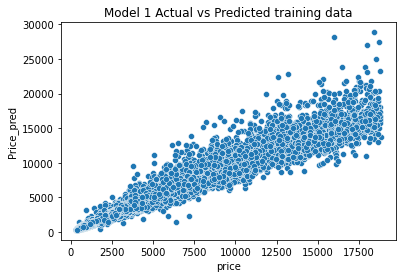

In [120]:
sns.scatterplot(x="price",y="Price_pred",data=x_train_b)
plt.title("Model 1 Actual vs Predicted training data")
plt.show()

In [121]:
x_test_b["price"]=log_transformer.inverse_transform(test_labels)
x_test_b["Price_pred"]=log_transformer.inverse_transform(predicted_test_1)
x_test_b.head(15)

carat  cut  color  clarity  depth  table     x     y     z    price  \
5858    1.22    4      4        2   61.7   56.0  6.83  6.87  4.23   9367.0   
3231    0.70    3      1        4   59.5   59.0  5.82  5.77  3.45   2863.0   
10882   0.66    4      0        2   61.3   57.0  5.59  5.63  3.44   3916.0   
12616   1.01    4      6        4   62.2   54.0  6.41  6.47  4.01   4444.0   
10976   0.41    3      0        4   62.4   60.0  4.71  4.75  2.95   1008.0   
15509   0.53    1      1        5   62.6   64.0  5.13  5.22  3.24   1283.0   
2626    1.17    3      2        6   59.9   59.0  6.86  6.82  4.10   4168.0   
16705   2.01    2      5        4   62.3   59.0  8.02  8.10  5.02  15966.0   
7129    0.57    3      2        4   60.3   58.0  5.40  5.44  3.27   1755.0   
11654   0.43    1      2        5   63.8   57.0  4.82  4.80  3.07    949.0   
3404    0.79    4      4        1   62.0   56.0  5.92  5.96  3.68   3676.0   
17722   0.91    3      1        4   62.2   60.0  6.21  6.13  3.84   4677.0   
3510    1.20    2      5        5   62.2   55.0  6.75  6.92  4.25   5409.0   
2509    0.30    2      4        3   63.0   59.0  4.21  4.27  2.67    527.0   
10576   1.00    3      2        4   62.5   54.0  6.33  6.30  3.95   6155.0   

         Price_pred  
5858    8529.901063  
3231    2941.114523  
10882   3599.363969  
12616   4054.031046  
10976   1130.511018  
15509   1517.685377  
2626    5783.115016  
16705  14837.408082  
7129    1882.620922  
11654    954.771374  
3404    4270.870048  
17722   4797.441641  
3510    5201.917449  
2509     520.555159  
10576   4729.559646

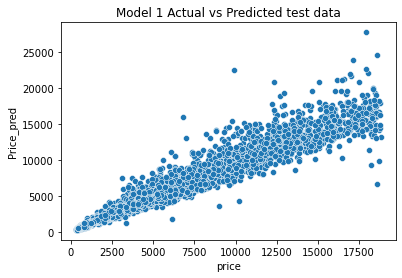

In [122]:
sns.scatterplot(x="price",y="Price_pred",data=x_test_b)
plt.title("Model 1 Actual vs Predicted test data")
plt.show()

We can see that, this model under predicts the value of most of the gems, and over predicts the value of some of the gems. But overall, the prediction is quite good.

Another important aspect is that the the model predicts low values more accurately than larger values.

**Let us try scaling and performing the same model (Model 2)**

In [123]:
#Importing standard scaler for performing scling
from sklearn.preprocessing import StandardScaler

In [124]:
sc=StandardScaler()

In [125]:
#Scaling the Train and test data
x_trains=sc.fit_transform(x_train)
x_tests=sc.transform(x_test)

In [126]:
x_trains=pd.DataFrame(x_trains)
x_tests=pd.DataFrame(x_tests)

In [127]:
x_trains.head()

0         1         2         3         4         5         6  \
0  0.817429  0.977540 -0.951149  1.241370 -1.105006 -0.199245  0.982079   
1 -0.919381  0.977540 -1.539373  0.028185 -0.532966 -0.646827 -0.979870   
2  0.838354 -1.715659  1.401747  0.634778  0.968637  0.248336  0.822282   
3 -1.170486 -0.817926 -0.951149 -1.791593 -0.747481  1.143499 -1.530281   
4 -0.626425 -0.817926 -0.362925 -1.185000  0.039073 -0.646827 -0.553745   

          7         8  
0  1.015233  0.847532  
1 -1.024827 -1.049107  
2  0.881018  0.976848  
3 -1.499051 -1.566372  
4 -0.523760 -0.531842

In [128]:
train_labels_s=pd.DataFrame(train_labels)
test_labels_s=pd.DataFrame(test_labels)

In [129]:
x_trains_b=x_trains.copy()
x_tests_b=x_tests.copy()

In [130]:
train_labels.head()

8748     8.651374
13822    6.998510
13583    8.466531
9953     6.186209
25531    7.627057
Name: log_price, dtype: float64

In [131]:
#Scaling the Train and test data
trains_labels=sc.fit_transform(train_labels_s)
tests_labels=sc.transform(test_labels_s)

In [132]:
trains_labels=pd.DataFrame(trains_labels)
tests_labels=pd.DataFrame(tests_labels)

In [133]:
#regression model for scaled variables
regression_model_2s=LinearRegression()

In [134]:
#fitting the model with the training data
regression_model_2s.fit(x_trains,trains_labels)

LinearRegression()

In [135]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_trains.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2s.coef_[0][idx]))

The coefficient for 0 is -0.5119069174460451
The coefficient for 1 is 0.028280253872894442
The coefficient for 2 is -0.1303048791564243
The coefficient for 3 is -0.19595738971128038
The coefficient for 4 is 0.06116730354779685
The coefficient for 5 is 0.020218531642218995
The coefficient for 6 is 0.8926993076851556
The coefficient for 7 is 0.47521251266603387
The coefficient for 8 is 0.20779743699162523


In [136]:
#Intercept value
print("The intercept value for our model is",regression_model_2s.intercept_[0])

The intercept value for our model is -1.42910982648071e-16


In [137]:
# R square on training data
regression_model_2s.score(x_trains, trains_labels)

0.9792659236687614

In [138]:
# R square on testing data
regression_model_2s.score(x_tests, tests_labels)

0.9794694521937579

In [139]:
#predicting training labels
predicted_train_2s=regression_model_2s.predict(x_trains)

In [140]:
#RMSE on Training data
np.sqrt(metrics.mean_squared_error(trains_labels,predicted_train_2s))

0.14399332043965976

In [141]:
#RMSE on Testing data
predicted_test_2s=regression_model_2s.predict(x_tests)
np.sqrt(metrics.mean_squared_error(tests_labels,predicted_test_2s))

0.14382236479158844

MSE value

In [142]:
metrics.mean_squared_error(trains_labels,predicted_train_2s)

0.020734076331238534

In [143]:
metrics.mean_squared_error(tests_labels,predicted_test_2s)

0.020684872614244742

Now let us try with stats model

In [144]:
# concatenate X and y into a single dataframe
data_train_s = pd.concat([x_train, train_labels], axis=1)
data_test_s=pd.concat([x_test,test_labels],axis=1)
data_train_s.head()

carat  cut  color  clarity  depth  table     x     y     z  log_price
8748    1.19    4      1        6   60.2   57.0  6.84  6.87  4.13   8.651374
13822   0.36    4      0        4   61.0   56.0  4.63  4.59  2.81   6.998510
13583   1.20    1      5        5   63.1   58.0  6.66  6.72  4.22   8.466531
9953    0.24    2      1        1   60.7   60.0  4.01  4.06  2.45   6.186209
25531   0.50    2      2        2   61.8   56.0  5.11  5.15  3.17   7.627057

Let us scale the values for the train and test datasets

In [145]:
from scipy.stats import zscore

In [146]:
data_train_s = data_train_s.apply(zscore)
data_test_s = data_test_s.apply(zscore)

The formula will be the same for scaled data also

In [147]:
lm_2s = smf.ols(formula= formula, data = data_train_s).fit()
lm_2s.params

Intercept   -1.032160e-16
carat       -5.119069e-01
cut          2.828025e-02
color       -1.303049e-01
clarity     -1.959574e-01
depth        6.116730e-02
table        2.021853e-02
x            8.926993e-01
y            4.752125e-01
z            2.077974e-01
dtype: float64

In [148]:
print(lm_2s.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 9.888e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:53:50   Log-Likelihood:                 9785.6
No. Observations:               18853   AIC:                        -1.955e+04
Df Residuals:                   18843   BIC:                        -1.947e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.032e-16      0.001  -9.84e-14      1.0

Now we can see that the intecept value is close to 0. The R squared values are similar. However, the Root Mean squared values have decreased to a good extent.

We can see that scaling does not improve the performance of the model, it only helps to center the values. So it is not required to scale the values further.

In [149]:
x_trains_b["price"]=log_transformer.inverse_transform(trains_labels)
x_trains_b["Price_pred"]=log_transformer.inverse_transform(predicted_train_2s)
x_trains_b.head(15)

0         1         2         3         4         5         6  \
0   0.817429  0.977540 -0.951149  1.241370 -1.105006 -0.199245  0.982079   
1  -0.919381  0.977540 -1.539373  0.028185 -0.532966 -0.646827 -0.979870   
2   0.838354 -1.715659  1.401747  0.634778  0.968637  0.248336  0.822282   
3  -1.170486 -0.817926 -0.951149 -1.791593 -0.747481  1.143499 -1.530281   
4  -0.626425 -0.817926 -0.362925 -1.185000  0.039073 -0.646827 -0.553745   
5   0.838354 -0.817926  0.813523  0.028185  1.111647  0.695917  0.928813   
6   0.377995 -2.613392  0.225299  1.847963  3.971844  1.143499  0.387280   
7   0.838354  0.977540  1.401747  1.847963  0.110578 -0.646827  0.964324   
8  -0.982157  0.079807  0.225299 -1.791593 -0.175442  0.695917 -1.166300   
9   0.503548  0.977540  0.225299 -1.185000  0.253588 -1.049650  0.680241   
10 -0.207917 -2.613392 -0.951149  1.241370  2.327231 -1.541989 -0.154254   
11 -1.044934  0.977540  0.813523 -0.578407  0.539608 -0.646827 -1.326096   
12 -1.003083  0.977540 -0.362925 -1.185000 -0.389957 -1.094408 -1.157422   
13 -0.835680  0.977540 -0.951149 -1.791593 -0.032432 -0.199245 -0.917727   
14  2.554239 -0.817926  0.813523  0.028185 -0.175442  0.695917  2.082901   

           7         8     price  Price_pred  
0   1.015233  0.847532  2.345271    2.594853  
1  -1.024827 -1.049107  0.462219    0.393737  
2   0.881018  0.976848  1.955748    1.887504  
3  -1.499051 -1.566372  0.208068    0.252720  
4  -0.523760 -0.531842  0.857186    0.750221  
5   0.898913  1.063059  2.794327    2.706007  
6   0.335213  0.861900  0.807928    1.338171  
7   0.997337  0.991217  1.450292    1.800682  
8  -1.141146 -1.164054  0.344130    0.369634  
9   0.693118  0.718216  3.267346    2.865917  
10 -0.192697  0.086003  1.081532    0.829428  
11 -1.311151 -1.264634  0.225304    0.227672  
12 -1.141146 -1.178423  0.339960    0.351432  
13 -0.890613 -0.905422  0.561175    0.602787  
14  2.214215  2.111958  7.192767    6.764123

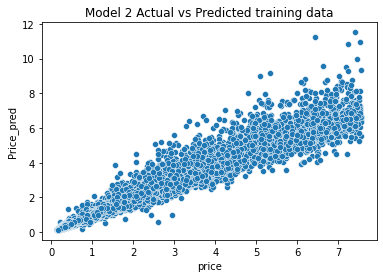

In [150]:
sns.scatterplot(x="price",y="Price_pred",data=x_trains_b)
plt.title("Model 2 Actual vs Predicted training data")
plt.show()

In [151]:
x_tests_b["price"]=log_transformer.inverse_transform(tests_labels)
x_tests_b["Price_pred"]=log_transformer.inverse_transform(predicted_test_2s)
x_tests_b.head(15)

0         1         2         3         4         5         6  \
0   0.880205  0.977540  0.813523 -1.185000 -0.032432 -0.646827  0.973201   
1  -0.207917  0.079807 -0.951149  0.028185 -1.605540  0.695917  0.076564   
2  -0.291618  0.977540 -1.539373 -1.185000 -0.318452 -0.199245 -0.127621   
3   0.440771  0.977540  1.989972  0.028185  0.325093 -1.541989  0.600342   
4  -0.814754  0.079807 -1.539373  0.028185  0.468103  1.143499 -0.908849   
5  -0.563649 -1.715659 -0.951149  0.634778  0.611112  2.933824 -0.535990   
6   0.775578  0.079807 -0.362925  1.241370 -1.319521  0.695917  0.999834   
7   2.533314 -0.817926  1.401747  0.028185  0.396598  0.695917  2.029636   
8  -0.479947  0.079807 -0.362925  0.028185 -1.033501  0.248336 -0.296295   
9  -0.772903 -1.715659 -0.362925  0.634778  1.469172 -0.199245 -0.811196   
10 -0.019588  0.977540  0.813523 -1.791593  0.182083 -0.646827  0.165340   
11  0.231517  0.079807 -0.951149  0.028185  0.325093  1.143499  0.422790   
12  0.838354 -0.817926  1.401747  0.634778  0.325093 -1.094408  0.902181   
13 -1.044934 -0.817926  0.813523 -0.578407  0.897132  0.695917 -1.352729   
14  0.419846  0.079807 -0.362925  0.028185  0.539608 -1.541989  0.529322   

           7         8     price  Price_pred  
0   1.015233  0.991217  3.809090    3.474336  
1   0.030993 -0.129524  1.188489    1.220345  
2  -0.094274 -0.143893  1.616780    1.488233  
3   0.657327  0.675110  1.830741    1.672760  
4  -0.881665 -0.847948  0.426108    0.476944  
5  -0.461126 -0.431262  0.540087    0.637015  
6   0.970494  0.804426  1.718956    2.371511  
7   2.115791  2.126326  6.432635    5.985557  
8  -0.264279 -0.388157  0.734764    0.787233  
9  -0.836927 -0.675526  0.401588    0.403988  
10  0.200998  0.200951  1.519363    1.760635  
11  0.353108  0.430846  1.925015    1.973715  
12  1.059971  1.019954  2.220677    2.137110  
13 -1.311151 -1.250265  0.225304    0.222596  
14  0.505218  0.588899  2.521278    1.946270

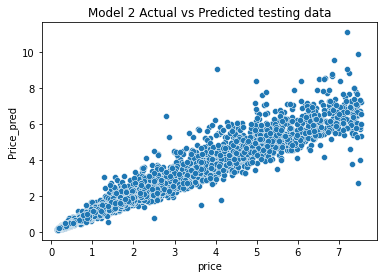

In [152]:
sns.scatterplot(x="price",y="Price_pred",data=x_tests_b)
plt.title("Model 2 Actual vs Predicted testing data")
plt.show()

We can see that, this model under predicts the value of most of the gems, and over predicts the value of some of the gems. But overall, the prediction is quite good.

Another important aspect is that the the model predicts low values more accurately than larger values.

**Model 3**

**Now, let us try to add the volume column, and drop the x,y and z columns, and see if the model performs better.**

Cecking vif values.

In [153]:
X = cz_df[["carat","cut","clarity","depth","table","volume"]]
checkvif(X)

  Variables          VIF
0     carat  1764.338845
1       cut     8.950713
2   clarity     7.911882
3     depth   447.140219
4     table   423.028823
5    volume  1778.181742


In [154]:
X = cz_df[["carat","cut","clarity","depth","table"]]
checkvif(X)

  Variables         VIF
0     carat    4.413427
1       cut    8.153572
2   clarity    7.907677
3     depth  442.977363
4     table  420.685935


In [155]:
X = cz_df[["carat","cut","clarity","depth"]]
checkvif(X)

  Variables        VIF
0     carat   4.368148
1       cut   7.889253
2   clarity   7.882628
3     depth  17.171241


In [156]:
X = cz_df[["carat","cut","clarity"]]
checkvif(X)

  Variables       VIF
0     carat  4.053025
1       cut  3.468804
2   clarity  5.378350


In [157]:
X = cz_df[["carat","cut"]]
checkvif(X)

  Variables      VIF
0     carat  2.51308
1       cut  2.51308


We can see that removing the x,y and z variables and adding the volume does not reduce the collinearity.

In [158]:
# Now let us drop the target column in X and add it in Y
x1=cz_df.drop(["log_price","price","x","y","z"],axis=1)
y=cz_df[("log_price")]

In [159]:
x1.head()

carat  cut  color  clarity  depth  table  volume
1   0.30    4      1        5   62.1   58.0   48.73
2   0.33    3      3        0   60.8   58.0   53.23
3   0.90    2      1        2   62.2   60.0  139.73
4   0.42    4      2        3   61.6   56.0   68.48
5   0.31    4      2        1   60.4   59.0   51.07

In [160]:
y.head()

1    6.214608
2    6.892642
3    8.746716
4    6.987490
5    6.659294
Name: log_price, dtype: float64

In [161]:
#Now let us perform the train and test split
x1_train,x1_test,train_labels,test_labels=train_test_split(x1,y,test_size=0.30,random_state=0)

In [162]:
x1_train_b = x1_train.copy()
x1_test_b = x1_test.copy()

In [163]:
#Building the first instance of linear regression model
regression_model_3=LinearRegression()

In [164]:
#fitting the model with the training data
regression_model_3.fit(x1_train,train_labels)

LinearRegression()

In [165]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[idx]))

The coefficient for carat is 0.371225529762738
The coefficient for cut is 0.01608471101074365
The coefficient for color is -0.08458704113599708
The coefficient for clarity is -0.08696999153216298
The coefficient for depth is 0.009155189128775408
The coefficient for table is 0.011905108465738706
The coefficient for volume is 0.011052989601997


In [166]:
#Intercept value
print("The intercept value for our model is",regression_model_3.intercept_)

The intercept value for our model is 5.318518288479604


In [167]:
# R square on training data
regression_model_3.score(x1_train, train_labels)

0.8816191788743005

In [168]:
# R square on testing data
regression_model_3.score(x1_test, test_labels)

0.8834669672868273

In [169]:
#predicting training labels
predicted_train_3=regression_model_3.predict(x1_train)

In [170]:
#RMSE on Training data
np.sqrt(metrics.mean_squared_error(train_labels,predicted_train_3))

0.35015511954695316

In [171]:
#RMSE on Testing data
predicted_test_3=regression_model_3.predict(x1_test)
np.sqrt(metrics.mean_squared_error(test_labels,predicted_test_3))

0.3487148863417469

MSE value

In [172]:
#Training data
metrics.mean_squared_error(train_labels,predicted_train_3)

0.12260860774494106

In [173]:
#Testing data
metrics.mean_squared_error(test_labels,predicted_test_3)

0.12160207195633746

Stats model

In [174]:
formula_3= "log_price ~ carat + cut + color + clarity + depth + table + volume"

In [175]:
# concatenate X and y into a single dataframe
data_train_1 = pd.concat([x1_train, train_labels], axis=1)
data_test_1=pd.concat([x1_test,test_labels],axis=1)
data_train_1.head()

carat  cut  color  clarity  depth  table  volume  log_price
8748    1.19    4      1        6   60.2   57.0  194.07   8.651374
13822   0.36    4      0        4   61.0   56.0   59.72   6.998510
13583   1.20    1      5        5   63.1   58.0  188.87   8.466531
9953    0.24    2      1        1   60.7   60.0   39.89   6.186209
25531   0.50    2      2        2   61.8   56.0   83.42   7.627057

In [176]:
lm_3 = smf.ols(formula= formula_3, data = data_train_1).fit()
lm_3.params

Intercept    5.318518
carat        0.371226
cut          0.016085
color       -0.084587
clarity     -0.086970
depth        0.009155
table        0.011905
volume       0.011053
dtype: float64

In [177]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.005e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:53:52   Log-Likelihood:                -6967.3
No. Observations:               18853   AIC:                         1.395e+04
Df Residuals:                   18845   BIC:                         1.401e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3185      0.204     26.082      0.0

In [178]:
x1_train_b["price"]=log_transformer.inverse_transform(train_labels)
x1_train_b["Price_pred"]=log_transformer.inverse_transform(predicted_train_3)
x1_train_b.head(15)

carat  cut  color  clarity  depth  table  volume    price    Price_pred
8748    1.19    4      1        6   60.2   57.0  194.07   5718.0   5393.747993
13822   0.36    4      0        4   61.0   56.0   59.72   1095.0   1157.312177
13583   1.20    1      5        5   63.1   58.0  188.87   4753.0   3936.531730
9953    0.24    2      1        1   60.7   60.0   39.89    486.0   1074.010496
25531   0.50    2      2        2   61.8   56.0   83.42   2053.0   1552.626924
2449    1.20    2      4        4   63.3   59.0  195.58   6834.0   5185.382006
16453   0.98    0      3        7   67.3   60.0  156.07   1933.0   2631.367803
2783    1.20    4      5        7   61.9   56.0  197.61   3506.0   3692.932653
7345    0.33    3      3        1   61.5   59.0   53.82    811.0   1106.395997
7510    1.04    4      3        2   62.1   55.1  170.95   8013.0   4699.671402
9661    0.70    0      1        6   65.0   54.0  110.49   2601.0   1687.793174
26851   0.30    4      4        3   62.5   56.0   48.16    527.0    785.377133
13181   0.32    4      2        2   61.2   55.0   53.74    801.0   1061.673205
16326   0.40    4      1        1   61.7   57.0   64.83   1334.0   1509.935146
3074    2.02    2      4        4   61.5   59.0  332.35  17888.0  31358.535541

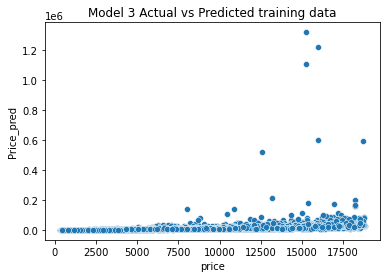

In [179]:
sns.scatterplot(x="price",y="Price_pred",data=x1_train_b)
plt.title("Model 3 Actual vs Predicted training data")
plt.show()

In [180]:
x1_test_b["price"]=log_transformer.inverse_transform(test_labels)
x1_test_b["Price_pred"]=log_transformer.inverse_transform(predicted_test_3)
x1_test_b.head(15)

carat  cut  color  clarity  depth  table  volume    price    Price_pred
5858    1.22    4      4        2   61.7   56.0  198.48   9367.0   6303.263227
3231    0.70    3      1        4   59.5   59.0  115.86   2863.0   2257.239336
10882   0.66    4      0        2   61.3   57.0  108.26   3916.0   2671.317110
12616   1.01    4      6        4   62.2   54.0  166.31   4444.0   2843.935258
10976   0.41    3      0        4   62.4   60.0   66.00   1008.0   1321.050518
15509   0.53    1      1        5   62.6   64.0   86.76   1283.0   1489.081388
2626    1.17    3      2        6   59.9   59.0  191.82   4168.0   4822.722847
16705   2.01    2      5        4   62.3   59.0  326.11  15966.0  26992.004590
7129    0.57    3      2        4   60.3   58.0   96.06   1755.0   1580.697211
11654   0.43    1      2        5   63.8   57.0   71.03    949.0   1030.698532
3404    0.79    4      4        1   62.0   56.0  129.84   3676.0   2752.418104
17722   0.91    3      1        4   62.2   60.0  146.18   4677.0   3539.022854
3510    1.20    2      5        5   62.2   55.0  198.52   5409.0   4259.241655
2509    0.30    2      4        3   63.0   59.0   48.00    527.0    790.384113
10576   1.00    3      2        4   62.5   54.0  157.52   6155.0   3558.470165

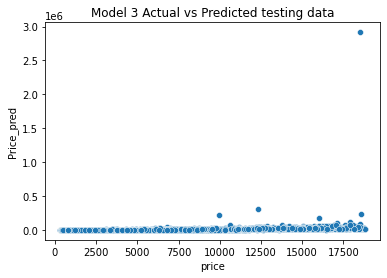

In [181]:
sns.scatterplot(x="price",y="Price_pred",data=x1_test_b)
plt.title("Model 3 Actual vs Predicted testing data")
plt.show()

In [182]:
x1_train_b[x1_train_b["Price_pred"]>100000]

carat  cut  color  clarity  depth  table  volume    price    Price_pred
8574    3.50    4      4        7   62.8   57.0  558.04  12588.0  5.173918e+05
125     2.80    3      5        6   61.1   59.0  445.99  15031.0  1.150078e+05
15081   3.51    3      6        4   62.5   59.0  560.95  18702.0  5.907493e+05
16539   3.00    1      5        7   57.0   64.0  465.46  10864.0  1.393929e+05
3026    4.01    3      6        7   62.5   62.0  621.50  15224.0  1.108839e+06
17077   3.00    3      3        7   59.7   60.0  486.74  13204.0  2.108077e+05
19848   2.74    2      4        6   63.3   58.0  440.38  17185.0  1.141436e+05
1073    3.01    0      5        6   61.8   56.0  474.19  18243.0  1.571327e+05
8206    3.01    0      5        6   65.8   56.0  474.19  18243.0  1.629937e+05
12759   3.40    0      0        7   66.8   52.0  551.65  15965.0  5.971414e+05
3195    2.77    3      4        7   62.6   62.0  438.42  10425.0  1.096460e+05
15489   3.01    3      5        6   60.2   59.0  489.74  18243.0  1.999937e+05
13053   3.01    3      5        7   62.7   58.0  462.83   8041.0  1.376704e+05
16873   3.01    1      5        6   63.9   60.0  471.01  18243.0  1.648232e+05
20506   4.01    3      5        7   61.0   61.0  631.89  15224.0  1.319302e+06
3391    2.65    3      3        6   62.0   61.0  420.60  16315.0  1.004746e+05
670     3.04    2      5        6   63.2   59.0  476.67  15355.0  1.770338e+05
9638    3.00    3      5        6   60.7   59.0  476.01  16971.0  1.719826e+05
8157    4.00    2      5        7   63.3   58.0  627.84  15985.0  1.218820e+06

We can see that the model predicts some of the values with a very high value, because of which the accuracy of the model takes a hit.

Even though the number of such predictions are very less, it actually predicts the cost of one of the gem to be 137670 while the actual cost of the gem would be only 8041.

This eventually is not what would be preffered for our predictions.

We can see that the model score decreases on using volume as a variable. So we can proceed with x,y and z values itself. However, to reduce the collinearity issues, we can try to do a Principal Component Analysis on the data. As PCA requires scaling, necessary scaling shall be performed.


**PCA**

In [183]:
#importing required libraries
from scipy.stats import zscore

In [184]:
xs=x.apply(zscore)
xs.head()

carat       cut     color   clarity     depth     table         x  \
1 -1.043547  0.979476 -0.940999  0.639804  0.253470  0.243737 -1.296116   
2 -0.980684  0.081120  0.231435 -2.396538 -0.679199  0.243737 -1.162932   
3  0.213713 -0.817237 -0.940999 -1.182001  0.325214  1.139749  0.275452   
4 -0.792095  0.979476 -0.354782 -0.574733 -0.105249 -0.652274 -0.807776   
5 -1.022593  0.979476 -0.354782 -1.789270 -0.966174  0.691743 -1.225085   

          y         z  
1 -1.289431 -1.260456  
2 -1.137370 -1.203017  
3  0.347459  0.347846  
4 -0.833249 -0.829661  
5 -1.164205 -1.274816

In [185]:
#importing necessary libraries for performing PCA
from sklearn.decomposition import PCA

**Checking whether the correlations are significant**

Ho : Correlations are not significant

Ha : Correlations are significant

In [186]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as cbs
chi_square,p=cbs(xs)
p

0.0

Since the p value is less than 0.05 we reject the null hypothesis and conclude that the correaltions are significant

**Checking kmo model to test the sample size **

In [187]:
from factor_analyzer.factor_analyzer import calculate_kmo as ck
kmo_all,kmo_model=ck(xs)
kmo_model

0.7690554922392911

Thesample size is good. We can continue with the PCA.

In [188]:
pca=PCA(n_components=9,random_state=1)
pca_transformed=pca.fit_transform(xs)

In [189]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47875218, 0.63562416, 0.77030494, 0.87983918, 0.95662314,
       0.99611239, 0.99948879, 0.99983748, 1.        ])

In [190]:
#Extracting eigen values
pca.explained_variance_

array([4.30892961e+00, 1.41190019e+00, 1.21217211e+00, 9.85844719e-01,
       6.91081351e-01, 3.55416425e-01, 3.03886815e-02, 3.13832161e-03,
       1.46276295e-03])

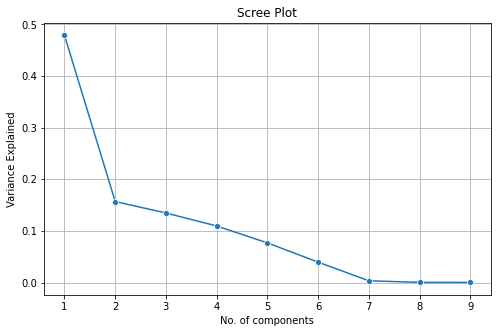

In [191]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,10),marker="o")
plt.xlabel("No. of components",fontsize=10)
plt.ylabel("Variance Explained",fontsize=10)
plt.title("Scree Plot",fontsize=12)
plt.grid()
plt.show()

The scree plot suggests that we should go with the first 2 PCs. However, they do not explain more than 63% of the data. So we can go with 6 PCs which explain 99% of the data.

In [192]:
pca = PCA(n_components=6, random_state=0)
pca_final = pca.fit_transform(xs)

In [193]:
pca_final_df = pd.DataFrame(pca_final, columns = ["PC0","PC1","PC2","PC3","PC4","PC5"])
pca_final_df.head(10)

PC0       PC1       PC2       PC3       PC4       PC5
0 -2.395962  0.266314  0.069542 -1.088164 -0.720439  0.913308
1 -2.607829  0.152777 -0.961379  1.568894  1.074046 -0.040259
2  0.389796  1.072233  0.115531  0.225300  1.771723  0.445655
3 -1.924846 -0.775951 -0.364937 -0.218668  0.041277  0.154985
4 -2.710111  0.238527 -1.564198  0.649388  0.723592  0.640008
5  0.719280 -0.915891 -0.528429 -1.664270  0.915704  0.081705
6  1.683307  1.299705  1.734146  0.910270 -0.185709  0.354962
7 -0.888543  1.933292 -0.380011 -0.684168 -0.278289  1.300931
8  2.565388  2.419737  1.350870  1.184124  0.030810  1.534063
9 -2.160072 -0.102190 -0.960844 -0.471871 -0.626087  0.054362

In [194]:
X = pca_final_df[["PC0","PC1","PC2","PC3","PC4","PC5"]]
checkvif(X)

  Variables  VIF
0       PC0  1.0
1       PC1  1.0
2       PC2  1.0
3       PC3  1.0
4       PC4  1.0
5       PC5  1.0


The value of VIFs have come to 1. So the multicollinearity has been dealt with.

In [195]:
#Now let us perform the train and test split
xs_train,xs_test,train_pca_labels,test_pca_labels=train_test_split(pca_final_df,y,test_size=0.30,random_state=0)

In [196]:
xs_train_b=xs_train.copy()
xs_test_b=xs_test.copy()

In [197]:
#Building the first instance of linear regression model
regression_model_pca=LinearRegression()

In [198]:
#fitting the model with the training data
regression_model_pca.fit(xs_train,train_pca_labels)

LinearRegression()

In [199]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(xs_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_pca.coef_[idx]))

The coefficient for PC0 is 0.44996858248684757
The coefficient for PC1 is -0.10900647406010625
The coefficient for PC2 is -0.08879071011578786
The coefficient for PC3 is -0.061645102057036556
The coefficient for PC4 is 0.354631954924047
The coefficient for PC5 is 0.025129840807381305


In [200]:
#Intercept value
print("The intercept value for our model is",regression_model_pca.intercept_)

The intercept value for our model is 7.782137718934456


In [201]:
# R square on training data
regression_model_pca.score(xs_train, train_pca_labels)

0.9546874365097763

In [202]:
# R square on testing data
regression_model_pca.score(xs_test, test_pca_labels)

0.9556521438951533

In [203]:
#RMSE on Training data
predicted_train_pca=regression_model_pca.predict(xs_train)
np.sqrt(metrics.mean_squared_error(train_pca_labels,predicted_train_pca))

0.21663524900119066

In [204]:
#RMSE on Testing data
predicted_test_pca=regression_model_pca.predict(xs_test)
np.sqrt(metrics.mean_squared_error(test_pca_labels,predicted_test_pca))

0.21512073736463297

MSE value

In [205]:
#Training data
metrics.mean_squared_error(train_pca_labels,predicted_train_pca)

0.04693083110980788

In [206]:
#Testing data
metrics.mean_squared_error(test_pca_labels,predicted_test_pca)

0.046276931644303396

Let us now try the model with statsmodel library

In [207]:
train_pca_labels=pd.DataFrame(train_pca_labels)
xs_train.reset_index(drop=True,inplace=True)
xs_train

PC0       PC1       PC2       PC3       PC4       PC5
0      1.711387 -0.394014 -1.221380 -1.842744 -0.293876 -0.136088
1     -2.314796 -0.278786 -0.556422 -1.473155  0.069690 -0.032402
2      2.279485  0.531260  1.502502  1.158148 -0.408878 -0.456846
3     -3.045631  1.789853 -0.614211  0.713745  1.240985  0.002012
4     -1.363938  0.061465  0.398294  0.475568  0.954886 -0.831906
...         ...       ...       ...       ...       ...       ...
18848 -2.898306  0.389426  1.775313  0.041557 -0.324936 -0.254417
18849 -2.282008 -1.374522  0.229568 -0.171969 -0.855418 -0.297290
18850  1.602641  0.710667 -2.097548 -1.154242 -0.723487 -1.088717
18851 -0.437071  1.435903  0.300517  0.763109 -1.039368  0.218644
18852  2.257700  0.367452  0.300708 -0.055440  0.040906 -0.363477

[18853 rows x 6 columns]

In [208]:
test_pca_labels=pd.DataFrame(test_pca_labels)
xs_test.reset_index(drop=True,inplace=True)
xs_test

PC0       PC1       PC2       PC3       PC4       PC5
0     1.504351 -1.763254 -0.747375  0.807426  0.776232  0.110070
1    -0.191721  0.986754 -1.513344 -0.755683  0.260833 -0.274949
2    -0.955780 -0.533723 -0.863897 -0.861357  1.459178  0.352074
3     1.151274 -2.331489  0.044223  1.021071 -0.961431 -0.333184
4    -1.719572  1.257983  0.283056 -0.919456  0.441444  1.076655
...        ...       ...       ...       ...       ...       ...
8075  1.834459  0.557434  2.846218 -0.302650  1.608160 -1.004588
8076 -0.712586 -0.084862  0.230097 -0.550997 -1.394961 -0.510050
8077 -2.385661  1.350914 -0.635560 -0.146493  0.307970  0.599423
8078 -1.947913 -1.070137 -0.257379  0.581841  0.230827  0.293009
8079  1.833282  5.085428 -2.677764  2.118765  0.396730 -0.053312

[8080 rows x 6 columns]

In [209]:
train_pca_labels.reset_index(drop=True,inplace=True)

In [210]:
test_pca_labels.reset_index(drop=True,inplace=True)

In [211]:
# concatenate X and y into a single dataframe
data_train_pca = pd.concat([xs_train, train_pca_labels], axis=1)
data_test_pca=pd.concat([xs_test,test_pca_labels],axis=1)
data_train_pca

PC0       PC1       PC2       PC3       PC4       PC5  log_price
0      1.711387 -0.394014 -1.221380 -1.842744 -0.293876 -0.136088   8.651374
1     -2.314796 -0.278786 -0.556422 -1.473155  0.069690 -0.032402   6.998510
2      2.279485  0.531260  1.502502  1.158148 -0.408878 -0.456846   8.466531
3     -3.045631  1.789853 -0.614211  0.713745  1.240985  0.002012   6.186209
4     -1.363938  0.061465  0.398294  0.475568  0.954886 -0.831906   7.627057
...         ...       ...       ...       ...       ...       ...        ...
18848 -2.898306  0.389426  1.775313  0.041557 -0.324936 -0.254417   5.998937
18849 -2.282008 -1.374522  0.229568 -0.171969 -0.855418 -0.297290   6.641182
18850  1.602641  0.710667 -2.097548 -1.154242 -0.723487 -1.088717   8.371011
18851 -0.437071  1.435903  0.300517  0.763109 -1.039368  0.218644   7.050123
18852  2.257700  0.367452  0.300708 -0.055440  0.040906 -0.363477   8.868835

[18853 rows x 7 columns]

In [212]:
formula_4= "log_price ~ PC0 + PC1 + PC2 + PC3 + PC4 + PC5"

In [213]:
lm_pca = smf.ols(formula= formula_4, data = data_train_pca).fit()
lm_pca.params

Intercept    7.782138
PC0          0.449969
PC1         -0.109006
PC2         -0.088791
PC3         -0.061645
PC4          0.354632
PC5          0.025130
dtype: float64

In [214]:
print(lm_pca.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 6.618e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:53:54   Log-Likelihood:                 2085.2
No. Observations:               18853   AIC:                            -4156.
Df Residuals:                   18846   BIC:                            -4101.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7821      0.002   4931.213      0.0

In [215]:
xs_train_b["price"]=log_transformer.inverse_transform(train_pca_labels)
xs_train_b["Price_pred"]=log_transformer.inverse_transform(predicted_train_pca)
xs_train_b.head(15)

PC0       PC1       PC2       PC3       PC4       PC5    price  \
8744   1.711387 -0.394014 -1.221380 -1.842744 -0.293876 -0.136088   5005.0   
13811 -2.314796 -0.278786 -0.556422 -1.473155  0.069690 -0.032402   1710.0   
13573  2.279485  0.531260  1.502502  1.158148 -0.408878 -0.456846   1245.0   
9947  -3.045631  1.789853 -0.614211  0.713745  1.240985  0.002012    699.0   
25500 -1.363938  0.061465  0.398294  0.475568  0.954886 -0.831906      NaN   
2448   2.108582  0.256860  0.994795  0.881662  0.284159  0.455248    892.0   
16439  1.892324  1.660007  4.578305  0.164468 -0.369390  1.080707   4545.0   
2782   2.246868 -1.317950 -0.009615 -0.298666 -1.882374  0.102818    887.0   
7342  -2.385643  0.474113 -0.514529  1.356657  0.680106  0.479826   3515.0   
7507   0.764574 -1.880601 -0.358471  0.323873  0.963682  0.014607    700.0   
9656   0.043657  0.450120  3.762123 -0.938349  0.177615 -1.396246   1749.0   
26816 -2.516895 -0.995035  0.233869  0.813230 -0.726228  0.460515      NaN   
13172 -2.693158 -1.041201 -0.581264  0.045313  0.316540 -0.248227    985.0   
16312 -2.360961 -0.572280 -0.630946  0.038045  1.283225  0.520360    736.0   
3073   4.561986  0.067008 -0.311653  0.652084  0.784287 -0.214064  11046.0   

         Price_pred  
8744    6060.599484  
13811   1027.680558  
13573   4396.831810  
9947     786.249866  
25500   1660.301680  
2448    5839.891563  
16439   2785.501261  
2782    3988.304445  
7342     965.157686  
7507    5914.443891  
9656    1816.050598  
26816    627.165923  
13172    933.213482  
16312   1486.215127  
3073   24048.117556

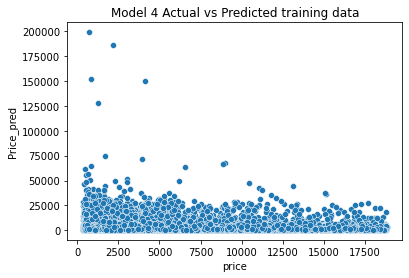

In [216]:
sns.scatterplot(x="price",y="Price_pred",data=xs_train_b)
plt.title("Model 4 Actual vs Predicted training data")
plt.show()

In [217]:
xs_test_b["price"]=log_transformer.inverse_transform(test_pca_labels)
xs_test_b["Price_pred"]=log_transformer.inverse_transform(predicted_test_pca)
xs_test_b.head(15)

PC0       PC1       PC2       PC3       PC4       PC5   price  \
5856   1.504351 -1.763254 -0.747375  0.807426  0.776232  0.110070  5487.0   
3230  -0.191721  0.986754 -1.513344 -0.755683  0.260833 -0.274949  8567.0   
10874 -0.955780 -0.533723 -0.863897 -0.861357  1.459178  0.352074     NaN   
12608  1.151274 -2.331489  0.044223  1.021071 -0.961431 -0.333184     NaN   
10968 -1.719572  1.257983  0.283056 -0.919456  0.441444  1.076655     NaN   
15496 -0.361799  3.434078  0.883185 -0.092843  0.184418  1.199796     NaN   
2625   1.966342  0.713129 -1.192757 -1.024857 -0.488132 -0.206817  2859.0   
16691  4.590632 -0.155084  0.171616  1.158807  0.516157  0.055720     NaN   
7126  -0.713276  0.542028 -0.890377 -0.293244 -0.146377 -0.285821   666.0   
11646 -1.181977  1.036165  2.321996 -0.083789 -0.228738 -0.400261     NaN   
3403  -0.194164 -1.633661 -0.551450  1.240627  0.856410  0.254654  1432.0   
17706  0.686511  0.744974 -0.052629 -0.620895  0.717203  0.947263     NaN   
3509   2.137044 -0.838431  0.829763  0.673435 -0.625109 -1.114248  2301.0   
2508  -2.140792  0.948179  1.056762  1.472904 -0.361177  0.442318  2908.0   
10568  0.722447 -1.353159  0.675627 -0.625969  0.448270 -0.695979     NaN   

         Price_pred  
5856    7676.224961  
3230    2578.213338  
10874   3185.515650  
12608   3422.494349  
10968   1195.607058  
15496   1433.477609  
2625    5323.960072  
16691  21214.846005  
7126    1702.993125  
11646    939.317676  
3403    3482.287114  
17706   4150.295039  
3509    4770.761601  
2508     610.265293  
10568   4336.395377

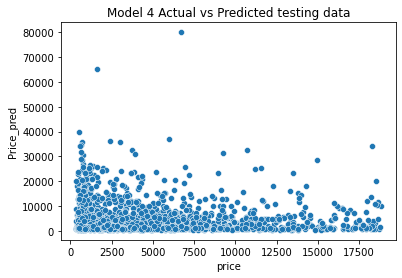

In [218]:
sns.scatterplot(x="price",y="Price_pred",data=xs_test_b)
plt.title("Model 4 Actual vs Predicted testing data")
plt.show()

In this model, we can see that all the prices are predicted with a low value. So this also is not a good predictor model.

We can see that the RMSE increases and the model score decreases after performing PCA. So we can conclude that the scaled model was the better model of the explored models

In [219]:
#importing necessary libraries for performing K-Means clustering
from sklearn.cluster import KMeans

In [220]:
WSS=[]

In [221]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(cz_df)
    WSS.append(km.inertia_)
WSS

[435944678403.8431,
 124008285540.06181,
 51568723178.80076,
 28655597950.86291,
 18805049515.39878,
 12685004383.612507,
 9110129189.924503,
 7079543153.579833,
 5552846818.237458,
 4564729046.017296]

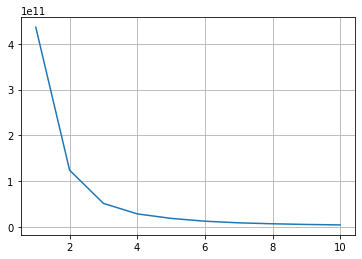

In [222]:
plt.plot(range(1,11),WSS)
plt.grid()
plt.show()

In [223]:
km=KMeans(n_clusters=2)
km.fit(cz_df)
labels=km.labels_

In [224]:
cz_df["Clusters"]=labels

In [225]:
#aggdata=cz_df.iloc[:,:8].groupby('K_Clusters').mean()
aggdata=cz_df.groupby('Clusters').median()
aggdata['Freq']=cz_df.Clusters.value_counts().sort_index()
aggdata

carat  cut  color  clarity  depth  table     x     y     z    price  \
Clusters                                                                        
0          0.54    3      2        4   61.8   57.0  5.25  5.25  3.23   1723.0   
1          1.51    3      3        4   61.8   58.0  7.34  7.34  4.54  10411.5   

          log_price  volume   Freq  
Clusters                            
0          7.452402   88.86  22025  
1          9.250762  244.51   4908

Cluster 1 is the high priced gem group.


The price of the gem would be high if,

1. number of carat > 1.51

2. color > 3 (i.e G or better)

3. Length of the cubic zirconia (x) > 7.34

4. Width of the cubic zirconia (y) > 7.34

5. Height of the cubic zirconia (z) > 4.54




Cluster 0 is the low priced gem group


The price of the gem would be lower if,

1. number of carat < 0.54

2. color > 2 (i.e D or E)

3. Length of the cubic zirconia (x) < 5.25

4. Width of the cubic zirconia (y) < 5.25

5. Height of the cubic zirconia (z) < 3.23


**1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

**Imporant Variables for Prediction**

Scaled Log price = (-0.5119) * carat + (0.0282) * cut + (-0.1303) * color + (-0.19595) * clarity + (0.06116) * depth +(0.02021) *  table + (0.89269) * x + (0.47521) *  y + (0.20779) * z + (-1.032160e-16)

Based on the equation we obtained for calculating the scaled value of log of price, the following variables, are identified as important variables for performing the linear regression.
1.	Dimension value x – When the value of x increases by one unit, the scaled log price increases by 0.89269 times.
2.	Number of carats – When the value of carat increases by one unit, the scaled log price decreases by 0.5119 times.
3.	Dimension value y – When the value of y increases by one unit, the scaled log price increases by 0.47521 times.
4.	Dimension value z – When the value of z increases by one unit, the scaled log price increases by 0.20779 times.
5.	Color of the gem – When the value of color increases by one unit, the scaled log price decreases by 0.19595 times


Based on the analysis, we can find the following insights,
1.	The price of the cubic zirconia does not have linear relationship with the number of its carats.
2.	The price of the cubic zirconia increases as the carat weight increases, but the amount it increases starts to get smaller as the number of carats increase.
3.	The gem would be high priced when the number of carats is greater than 1.51 in weight.
4.	The gem would be high priced if it has color equal to G or better.
5.	The gem would be high priced if its length is greater than or equal to 7.34mm
6.	The gem would be high priced if its width is greater than or equal to 7.34mm
7.	The gem would be high priced if its height is greater than or equal to 4.54mm
8.	The clarity, table and depth variables do not make a big impact in the prices.
9.	From the two clusters we formed, it was seen the low priced gems are sold more.
10.	It was also found that gems of clarity VS2 and above do fall in the bracket of high priced gems, while those of clarity less than VS2 fall in the low price bracket.


**Steps taken in the project**
1.	Initially the dataset was read, and the basic info, descriptive statistics and EDA was performed.
2.	Based on the EDA, insights were identified.
3.	Then null values were imputed, and some of the outliers were treated.
4.	The categorical variables were encoded, and then the train test split was made.
5.	The target variable was transformed using log transformation.
6.	Four linear regression models were made using different variables, scaling and after performing PCA.
7.	The performance metrics were calculated for all the models.
8.	The actual price was compared with the predicted price value.
9.	Based on the performance metrics, the best model was found. The scaled model with the original independent variables turned out to be the best model.
10.	Cluster analysis was done to form two groups of clusters, one of high priced cubic zirconia gems, and the other with low priced cubic zirconia gems.
11.	Based on the cluster analysis, the variables which separate the high priced and low priced gems were identified.
12.	Based on the linear regression model’s coefficients for the variables and the value of intercept, the five important factors were identified.
13.	Based on the insights gathered, business recommendations were made.


# You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [226]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [227]:
hp_df=pd.read_csv("Holiday_Package.csv",index_col=0)

In [228]:
hp_df.head(10)

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
1                no   48412   30     8                  1                  1   
2               yes   37207   45     8                  0                  1   
3                no   58022   46     9                  0                  0   
4                no   66503   31    11                  2                  0   
5                no   66734   44    12                  0                  2   
6               yes   61590   42    12                  0                  1   
7                no   94344   51     8                  0                  0   
8               yes   35987   32     8                  0                  2   
9                no   41140   39    12                  0                  0   
10               no   35826   43    11                  0                  2   

   foreign  
1       no  
2       no  
3       no  
4       no  
5       no  
6       no  
7       no  
8       no  
9       no  
10      no

In [229]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [230]:
hp_df.describe().T

count          mean           std     min      25%  \
Salary             872.0  47729.172018  23418.668531  1322.0  35324.0   
age                872.0     39.955275     10.551675    20.0     32.0   
educ               872.0      9.307339      3.036259     1.0      8.0   
no_young_children  872.0      0.311927      0.612870     0.0      0.0   
no_older_children  872.0      0.982798      1.086786     0.0      0.0   

                       50%      75%       max  
Salary             41903.5  53469.5  236961.0  
age                   39.0     48.0      62.0  
educ                   9.0     12.0      21.0  
no_young_children      0.0      0.0       3.0  
no_older_children      1.0      2.0       6.0

In [231]:
hp_df.describe(include="all").T

count unique  top freq          mean           std     min  \
Holliday_Package     872      2   no  471           NaN           NaN     NaN   
Salary             872.0    NaN  NaN  NaN  47729.172018  23418.668531  1322.0   
age                872.0    NaN  NaN  NaN     39.955275     10.551675    20.0   
educ               872.0    NaN  NaN  NaN      9.307339      3.036259     1.0   
no_young_children  872.0    NaN  NaN  NaN      0.311927       0.61287     0.0   
no_older_children  872.0    NaN  NaN  NaN      0.982798      1.086786     0.0   
foreign              872      2   no  656           NaN           NaN     NaN   

                       25%      50%      75%       max  
Holliday_Package       NaN      NaN      NaN       NaN  
Salary             35324.0  41903.5  53469.5  236961.0  
age                   32.0     39.0     48.0      62.0  
educ                   8.0      9.0     12.0      21.0  
no_young_children      0.0      0.0      0.0       3.0  
no_older_children      0.0      1.0      2.0       6.0  
foreign                NaN      NaN      NaN       NaN

In [232]:
hp_df.shape

(872, 7)

In [233]:
hp_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

There are no null values in the dataset

In [234]:
hp_df.duplicated().sum()

0

There are no duplicate values.

In [235]:
hp_df["Holliday_Package"].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

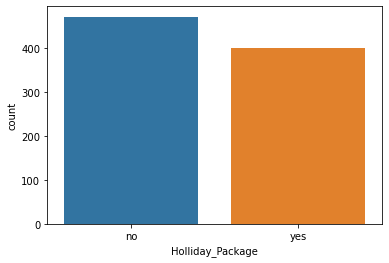

In [236]:
sns.countplot(hp_df["Holliday_Package"]);

In [237]:
hp_df["Holliday_Package"].value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

The dataset has similar number of yes and no, for employees accepting the holiday packages and not accepting the holiday packages.

In [238]:
feature_list_1=["Salary","age","educ","no_young_children","no_older_children"]

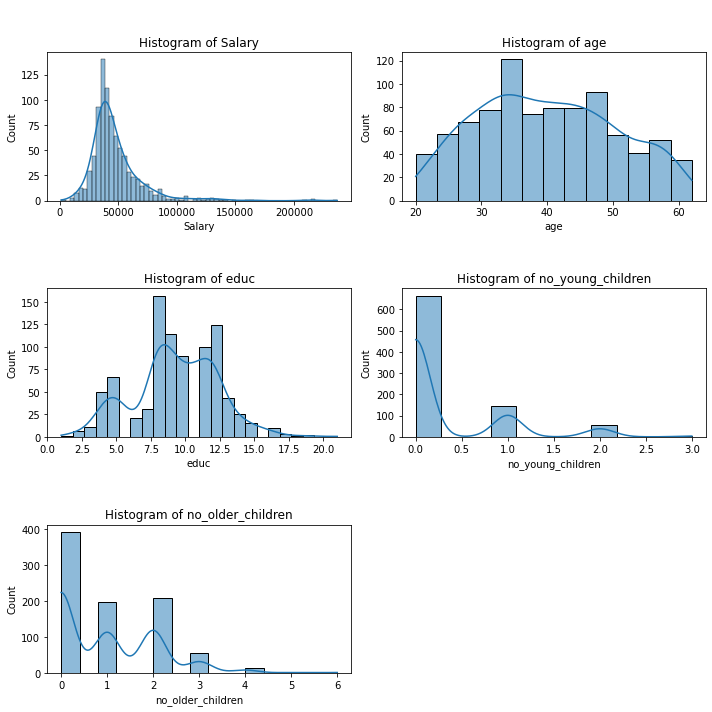

In [239]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list_1)):
    plt.subplot(3,2,i+1)
    sns.histplot(hp_df[feature_list_1[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list_1[i]))
    plt.tight_layout()

In [240]:
hp_df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

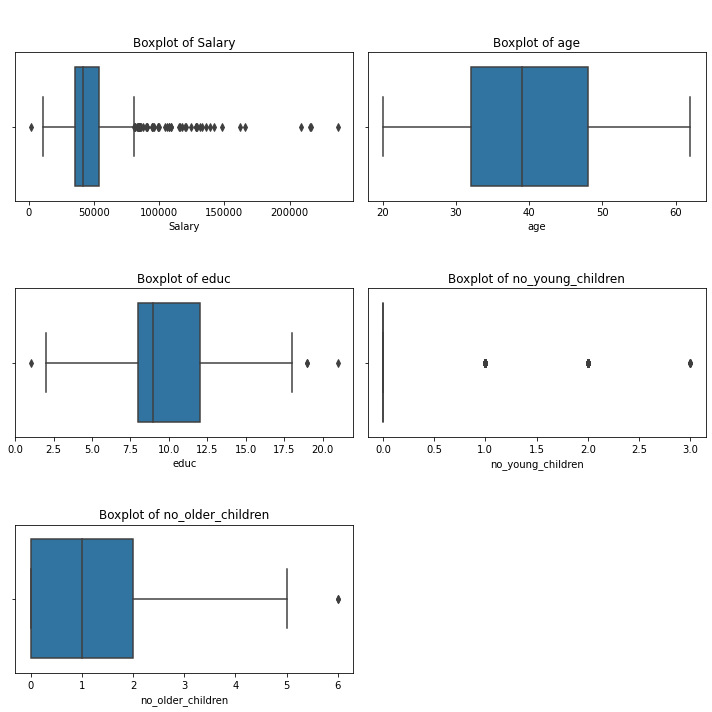

In [241]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list_1)):
    plt.subplot(3,2,i+1)
    sns.boxplot(hp_df[feature_list_1[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list_1[i]))
    plt.tight_layout()

In [242]:
for i in range (len(feature_list_1)):
    LL1,UL1=remove_outlier(hp_df[feature_list_1[i]])
    print("The percentage of outliers in",feature_list_1[i],"Upper is",round(hp_df[hp_df[feature_list_1[i]]>UL1][feature_list_1[i]].count()*100/len(hp_df),2),"%")
    print("The percentage of outliers in",feature_list_1[i],"lower is",round(hp_df[hp_df[feature_list_1[i]]<LL1][feature_list_1[i]].count()*100/len(hp_df),2),"%")

The percentage of outliers in Salary Upper is 6.42 %
The percentage of outliers in Salary lower is 0.11 %
The percentage of outliers in age Upper is 0.0 %
The percentage of outliers in age lower is 0.0 %
The percentage of outliers in educ Upper is 0.34 %
The percentage of outliers in educ lower is 0.11 %
The percentage of outliers in no_young_children Upper is 23.74 %
The percentage of outliers in no_young_children lower is 0.0 %
The percentage of outliers in no_older_children Upper is 0.23 %
The percentage of outliers in no_older_children lower is 0.0 %


We can see that the outliers are high only in number of youn childre, which is an acceptable value.

However, the one outlier in the Salary columns may be mistaken entry, as the value does not compare with the other values. So let us impute it.

In [243]:
hp_df["Salary"]=np.where(hp_df["Salary"]<5000,hp_df["Salary"].median(),hp_df["Salary"])

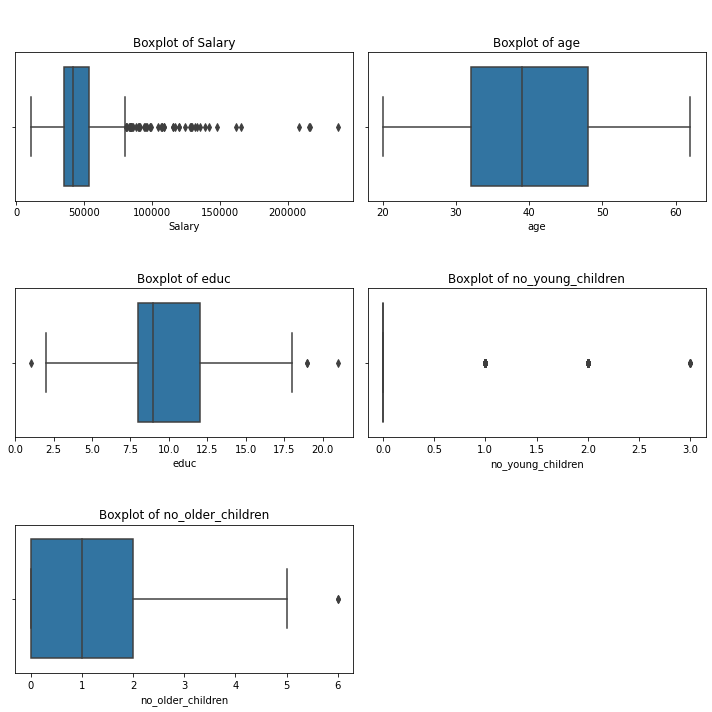

In [244]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list_1)):
    plt.subplot(3,2,i+1)
    sns.boxplot(hp_df[feature_list_1[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list_1[i]))
    plt.tight_layout()

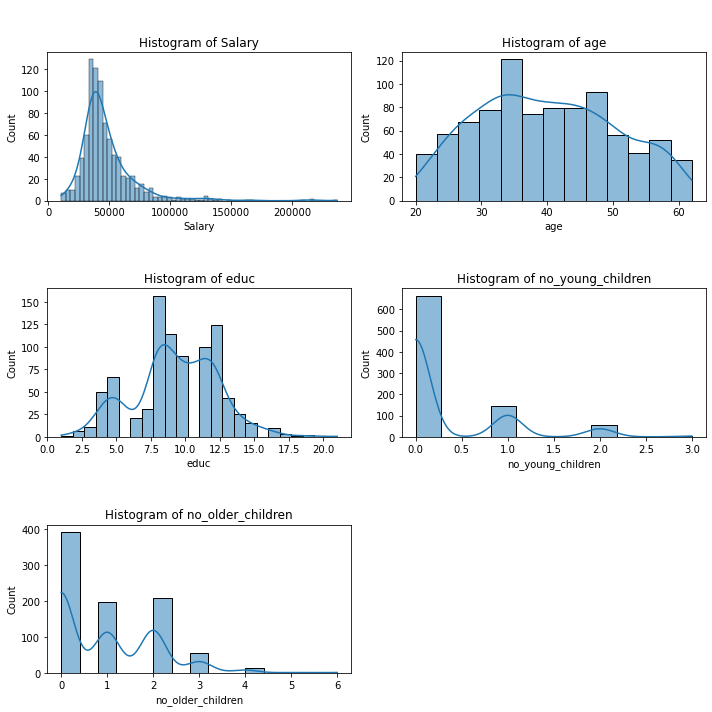

In [245]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list_1)):
    plt.subplot(3,2,i+1)
    sns.histplot(hp_df[feature_list_1[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list_1[i]))
    plt.tight_layout()

In [246]:
hp_df.skew()

Salary               3.127013
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [247]:
hp_df["foreign"].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

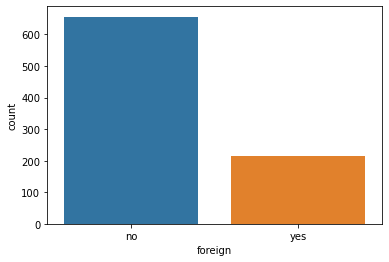

In [248]:
sns.countplot(hp_df["foreign"]);

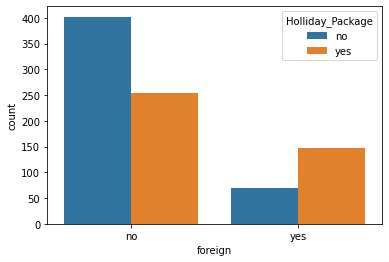

In [249]:
sns.countplot(hp_df["foreign"],hue=hp_df["Holliday_Package"]);

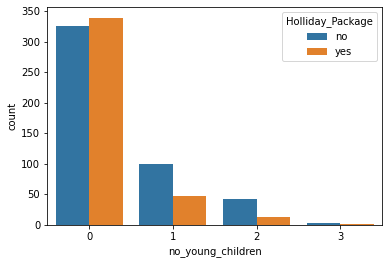

In [250]:
sns.countplot(x="no_young_children",data=hp_df,hue="Holliday_Package");

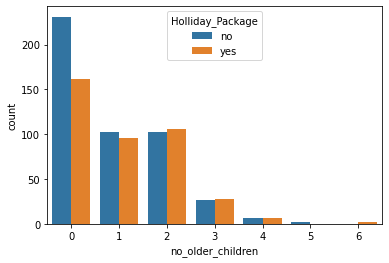

In [251]:
sns.countplot(x="no_older_children",data=hp_df,hue="Holliday_Package");

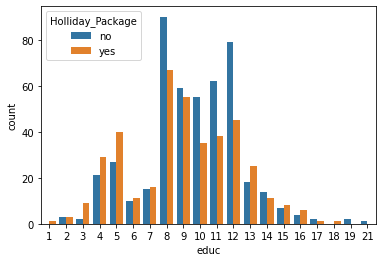

In [252]:
sns.countplot(x="educ",data=hp_df,hue="Holliday_Package");

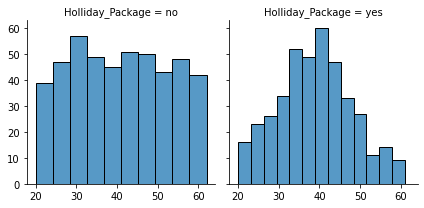

In [253]:
g=sns.FacetGrid(hp_df,col="Holliday_Package")
g.map_dataframe(sns.histplot, x="age")

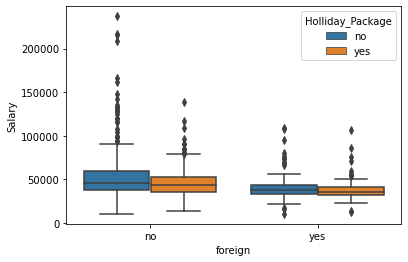

In [254]:
sns.boxplot(x="foreign",y="Salary",data=hp_df,hue="Holliday_Package");

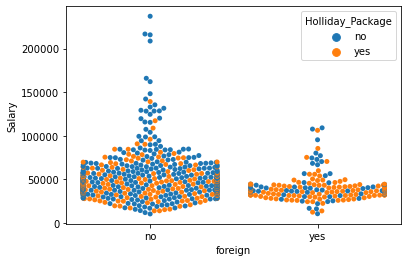

In [255]:
sns.swarmplot(x="foreign",y="Salary",data=hp_df,hue="Holliday_Package");

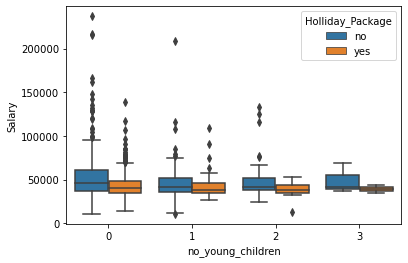

In [256]:
sns.boxplot(x="no_young_children",y="Salary",data=hp_df,hue="Holliday_Package");

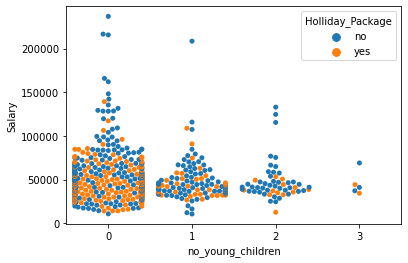

In [257]:
sns.swarmplot(x="no_young_children",y="Salary",data=hp_df,hue="Holliday_Package");

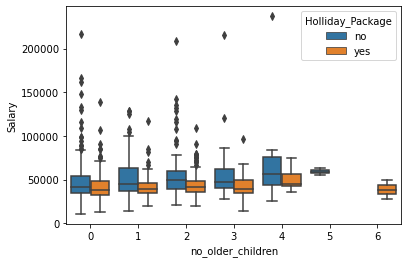

In [258]:
sns.boxplot(x="no_older_children",y="Salary",data=hp_df,hue="Holliday_Package");

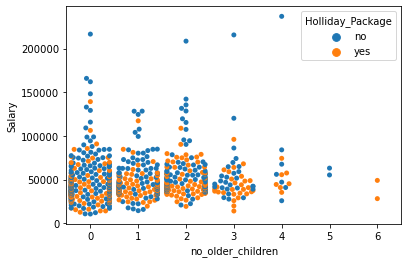

In [259]:
sns.swarmplot(x="no_older_children",y="Salary",data=hp_df,hue="Holliday_Package");

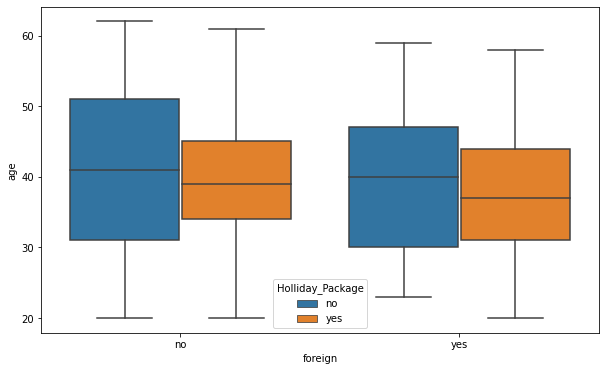

In [260]:
plt.figure(figsize=(10,6))
sns.boxplot(x="foreign",y="age",data=hp_df,hue="Holliday_Package");

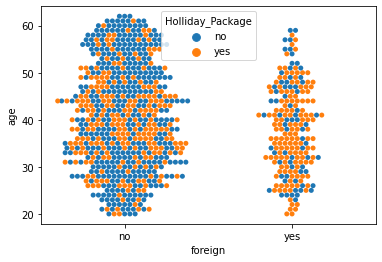

In [261]:
sns.swarmplot(x="foreign",y="age",data=hp_df,hue="Holliday_Package");

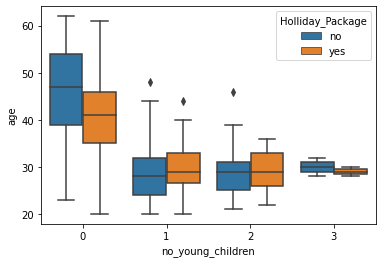

In [262]:
sns.boxplot(x="no_young_children",y="age",data=hp_df,hue="Holliday_Package");

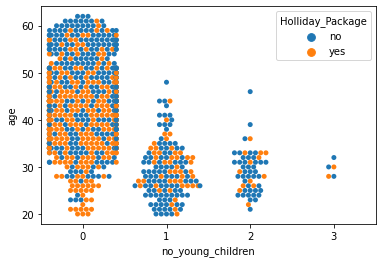

In [263]:
sns.swarmplot(x="no_young_children",y="age",data=hp_df,hue="Holliday_Package");

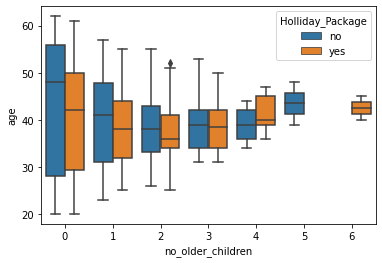

In [264]:
sns.boxplot(x="no_older_children",y="age",data=hp_df,hue="Holliday_Package");

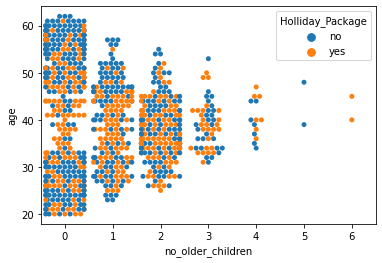

In [265]:
sns.swarmplot(x="no_older_children",y="age",data=hp_df,hue="Holliday_Package");

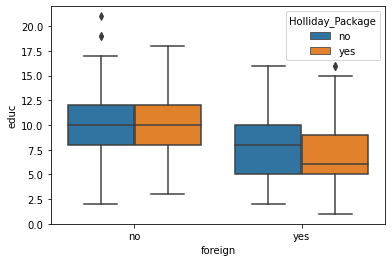

In [266]:
sns.boxplot(x="foreign",y="educ",data=hp_df,hue="Holliday_Package");

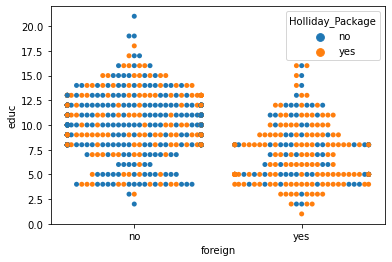

In [267]:
sns.swarmplot(x="foreign",y="educ",data=hp_df,hue="Holliday_Package");

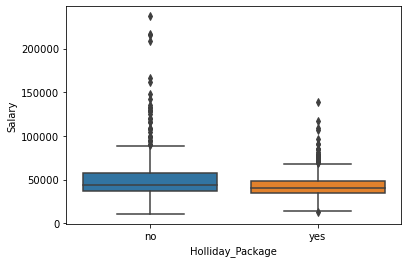

In [268]:
sns.boxplot(data = hp_df, x="Holliday_Package",y="Salary");

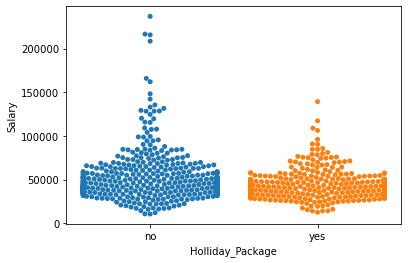

In [269]:
sns.swarmplot(data = hp_df, x="Holliday_Package",y="Salary");

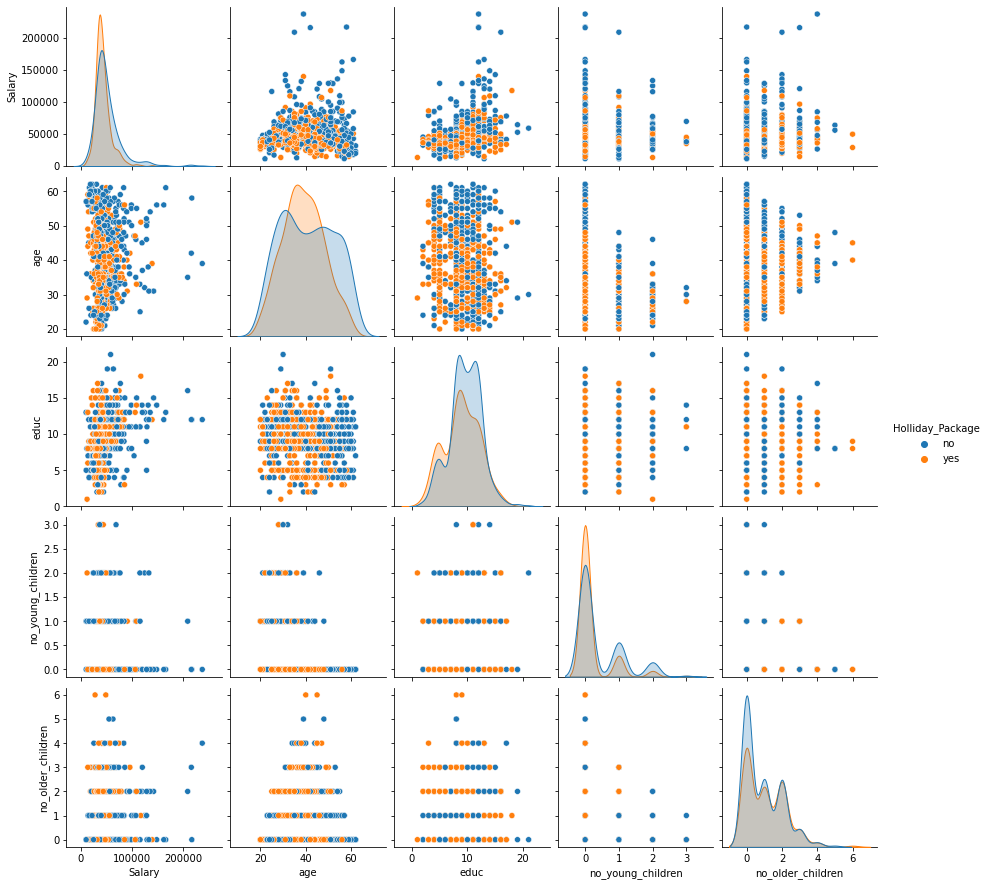

In [270]:
sns.pairplot(hp_df,hue="Holliday_Package")

We can see from the pairplot that the yes and no values are overlapping each other. If this is the case, the model may not perform good in classifying correctly.

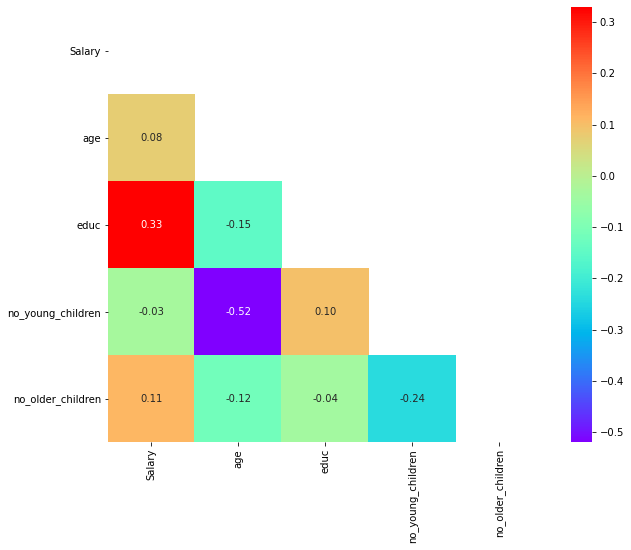

In [271]:
plt.figure(figsize=(10,8))
sns.heatmap(hp_df.corr(),square=True,annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(hp_df.corr()))
plt.show()

We can see that the variables do not have a high correlation among them.

However, age and salary are positively correlated, even though it is not strong,

The age and no of younger children have a negative correlation, but also it is not very high. Similarly the no of older children and education are also negatively correlated.

However, our dependent variable, "Holiday Package has a positive correlation with foreign column. For the rest of the columns, the Holiday package column does not have  a big correlation.

This could be bad news, as there is no good correlation between the dependent and independent variables, the model may find it difficult to predict values correctly.

**Before proceeding with the data split, let us change the column names to correct spelling**

In [272]:
hp_df.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)

**2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).**

In [273]:
# First we need to change the categorical data into continuous data
for feature in hp_df.columns:
    if hp_df[feature].dtype=="object":
        hp_df[feature]=pd.Categorical(hp_df[feature]).codes

In [274]:
hp_df["Holiday_Package"].value_counts()

0    471
1    401
Name: Holiday_Package, dtype: int64

In [275]:
hp_df["foreign"].value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [276]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 74.9 KB


The variables are all in numeric values.

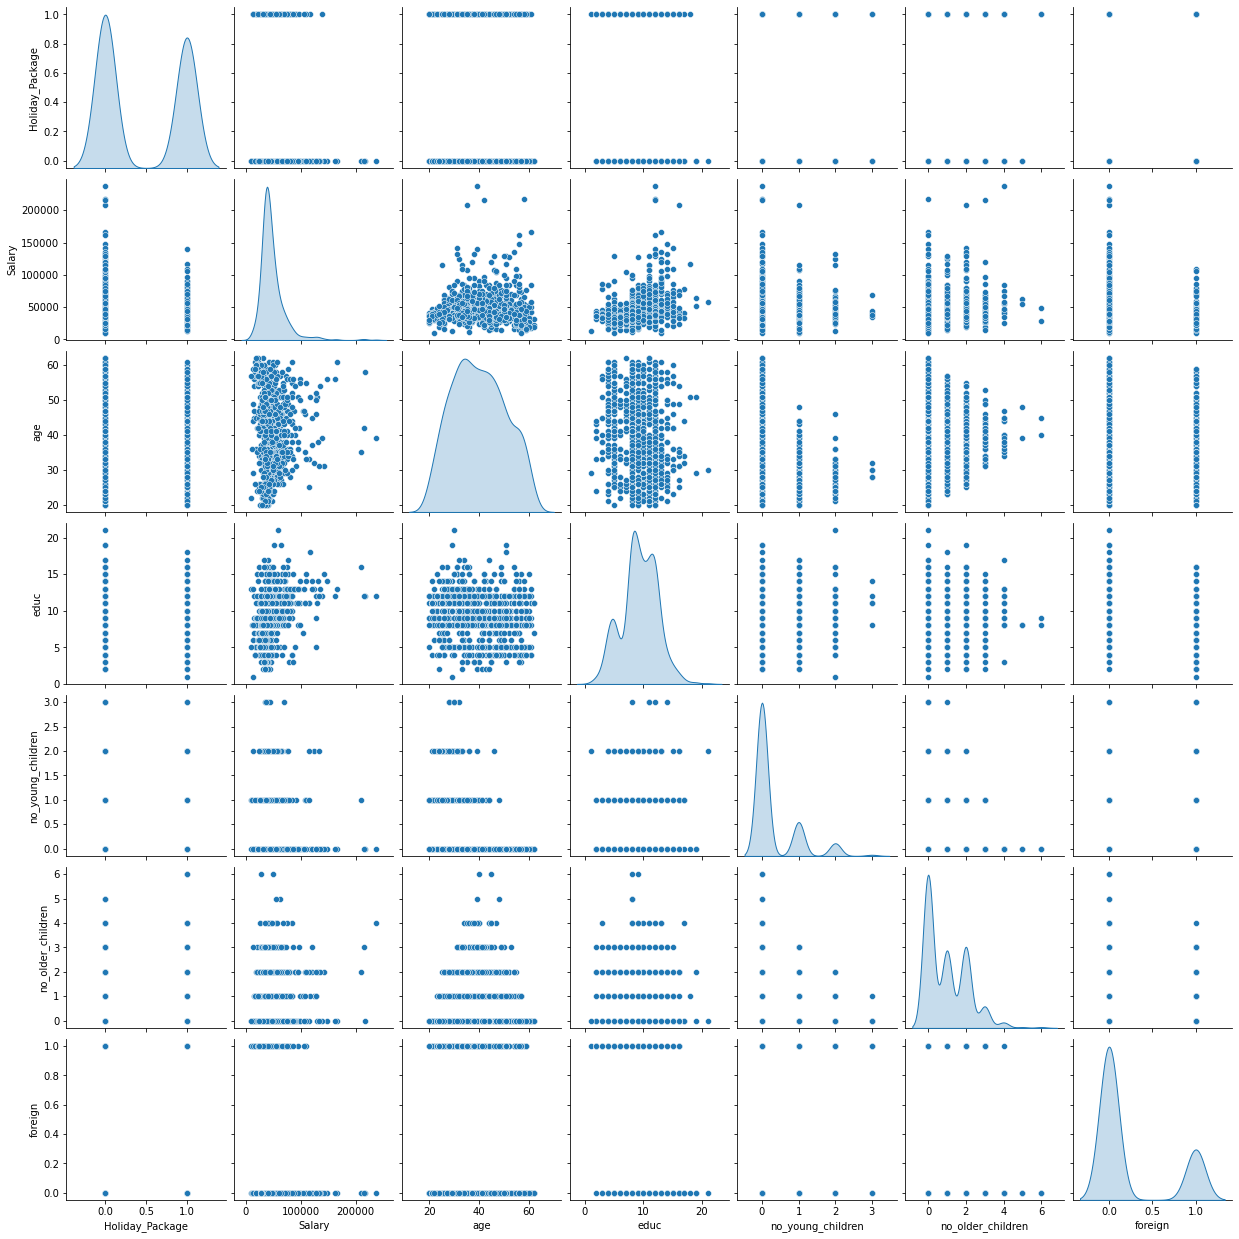

In [277]:
sns.pairplot(hp_df,diag_kind="kde")

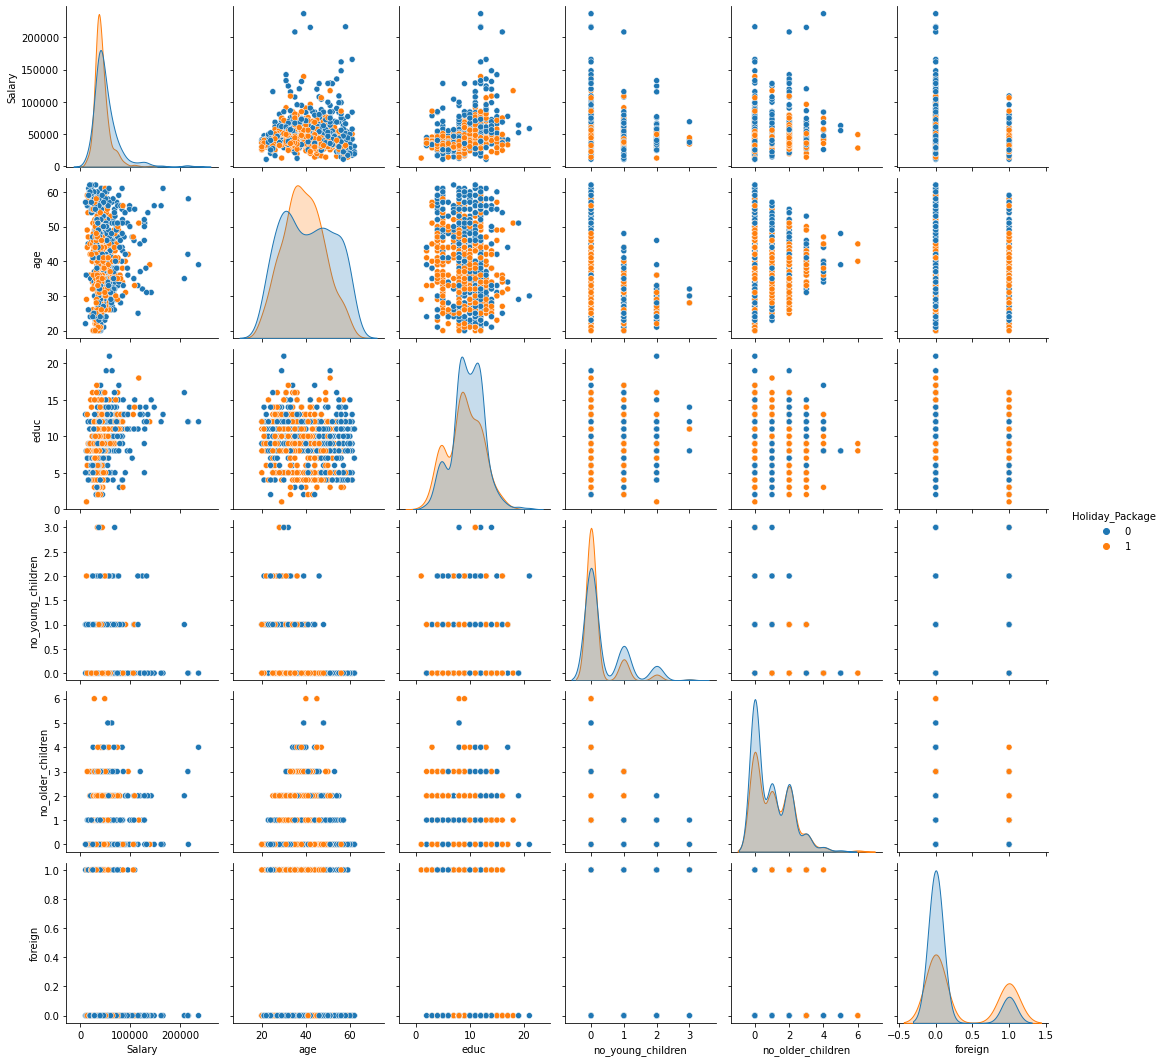

In [278]:
sns.pairplot(hp_df,diag_kind="kde",hue="Holiday_Package")

In [279]:
X = hp_df[["Salary","age","educ","no_young_children","no_older_children","foreign"]]
checkvif(X)

           Variables       VIF
0             Salary  6.087488
1                age  7.923487
2               educ  9.445066
3  no_young_children  1.531962
4  no_older_children  1.874688
5            foreign  1.431199


We can see that some of the variables have a VIF value greater than 5, but they are not greater than 10.

We can conclude that there is some multicollinearity in the dataset.

In [280]:
hp_df.head()

Holiday_Package   Salary  age  educ  no_young_children  no_older_children  \
1                0  48412.0   30     8                  1                  1   
2                1  37207.0   45     8                  0                  1   
3                0  58022.0   46     9                  0                  0   
4                0  66503.0   31    11                  2                  0   
5                0  66734.0   44    12                  0                  2   

   foreign  
1        0  
2        0  
3        0  
4        0  
5        0

In [281]:
# Now let us drop the target column in X and add it in Y
x=hp_df.drop("Holiday_Package",axis=1)
y=hp_df.pop("Holiday_Package")

In [282]:
x.head()

Salary  age  educ  no_young_children  no_older_children  foreign
1  48412.0   30     8                  1                  1        0
2  37207.0   45     8                  0                  1        0
3  58022.0   46     9                  0                  0        0
4  66503.0   31    11                  2                  0        0
5  66734.0   44    12                  0                  2        0

In [283]:
y.head()

1    0
2    1
3    0
4    0
5    0
Name: Holiday_Package, dtype: int8

In [284]:
#Now let us perform the train and test split
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=0)

In [285]:
print ("The shape of the training dataset of independent variables is",x_train.shape)
print ("The shape of the testing dataset of independent variables is",x_test.shape)
print ("The number of rows in the training dataset is",train_labels.shape)
print ("The number of rows in the testing dataset is",test_labels.shape)
print (hp_df.shape)

The shape of the training dataset of independent variables is (610, 6)
The shape of the testing dataset of independent variables is (262, 6)
The number of rows in the training dataset is (610,)
The number of rows in the testing dataset is (262,)
(872, 6)


In [286]:
train_labels.value_counts(1)

0    0.563934
1    0.436066
Name: Holiday_Package, dtype: float64

In [287]:
test_labels.value_counts(1)

1    0.515267
0    0.484733
Name: Holiday_Package, dtype: float64

In [288]:
x_train.head()

Salary  age  educ  no_young_children  no_older_children  foreign
236  98668.0   55    14                  0                  0        0
425  41528.0   57     9                  0                  0        0
242  52736.0   40    10                  0                  3        0
332  62232.0   45     9                  0                  0        0
272  43790.0   45     8                  0                  2        0

In [289]:
x_test.head()

Salary  age  educ  no_young_children  no_older_children  foreign
373  131576.0   38    14                  0                  2        0
677   40909.0   27     8                  2                  1        1
549   37733.0   39     9                  0                  2        0
294   38352.0   47     8                  0                  2        0
383   37144.0   58    14                  0                  0        0

**Logistic Regression**

In [290]:
#importing grid search cv function for better model performance
from sklearn.model_selection import GridSearchCV

In [291]:
#Giving parameter grid for using GridSearchCV
param_grid={
    "penalty":["l2","none"],
    "solver":["sag","lbfgs","newton-cg"],
    "tol":[0.0001,0.00001,0.001]
}

In [292]:
# Logistic Regression Model Creation
model_lr = LogisticRegression(max_iter=1000,n_jobs=2)

In [293]:
grid_search=GridSearchCV(estimator=model_lr,param_grid=param_grid,cv=3)

In [294]:
#Fitting the training data in the model
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [295]:
#Finding out best parameters
grid_search.best_params_

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}

In [296]:
best_grid_lr=grid_search.best_estimator_

In [297]:
ytrain_predict_lr=best_grid_lr.predict(x_train)
ytest_predict_lr=best_grid_lr.predict(x_test)

**Linear Discriminant Analysis**

In [298]:
#importing necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [299]:
from sklearn.preprocessing import scale

In [300]:
model_lda_1=LinearDiscriminantAnalysis()

In [301]:
#Giving parameter grid for using GridSearchCV
param_grid={
    "solver":["svd","lsqr","eigen"],
    "shrinkage":["auto","float","None"],
    "tol":[0.0001,0.00001,0.001]
}

In [302]:
grid_search_lda=GridSearchCV(estimator=model_lda_1,param_grid=param_grid,cv=3)

In [303]:
#Fitting the training data in the model
grid_search_lda.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [304]:
#Finding out best parameters
grid_search_lda.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [305]:
best_grid_lda=grid_search_lda.best_estimator_

In [306]:
ytrain_predict_lda_1=best_grid_lda.predict(x_train)
ytest_predict_lda_1=best_grid_lda.predict(x_test)

In [307]:
model_lda_2=LinearDiscriminantAnalysis()

In [308]:
#Fitting the training data in the model
model_lda_2.fit(x_train, train_labels)

LinearDiscriminantAnalysis()

In [309]:
ytrain_predict_lda_2=model_lda_2.predict(x_train)
ytest_predict_lda_2=model_lda_2.predict(x_test)

**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

In [310]:
#importing confusion matrix and classification report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [311]:
# importing AUC and ROC curve for model evaluating
from sklearn.metrics import roc_auc_score, roc_curve

**Logistic Regression Performance metrics**

Accuracy score

In [312]:
model_score_lr = best_grid_lr.score(x_train,train_labels)
print('Accuracy Score of training data is ',model_score_lr)

Accuracy Score of training data is  0.6852459016393443


In [313]:
model_score_lr = best_grid_lr.score(x_test,test_labels)
print('Accuracy Score of testing data is ',model_score_lr)

Accuracy Score of testing data is  0.6221374045801527


Confusion matrix

In [314]:
confusion_matrix(train_labels,ytrain_predict_lr)

array([[278,  66],
       [126, 140]], dtype=int64)

In [315]:
confusion_matrix(test_labels,ytest_predict_lr)

array([[101,  26],
       [ 73,  62]], dtype=int64)

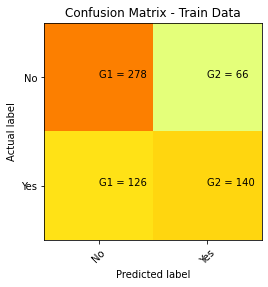

In [316]:
cm = metrics.confusion_matrix(train_labels, ytrain_predict_lr)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

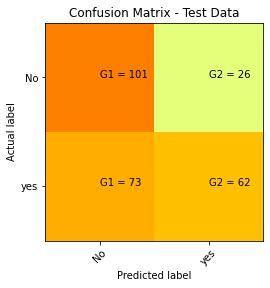

In [317]:
cm = metrics.confusion_matrix(test_labels, ytest_predict_lr)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification report

In [318]:
print(classification_report(train_labels,ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.69       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.69      0.68       610



In [319]:
print(classification_report(test_labels,ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       127
           1       0.70      0.46      0.56       135

    accuracy                           0.62       262
   macro avg       0.64      0.63      0.61       262
weighted avg       0.64      0.62      0.61       262



ROC curve and AUC

AUC: 0.742


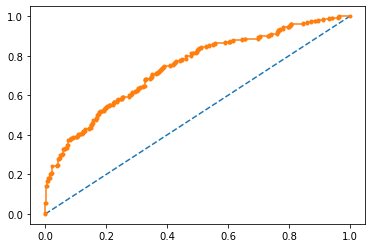

In [320]:
probs_tr_lr = best_grid_lr.predict_proba(x_train)
probs_tr_lr = probs_tr_lr[:, 1]
auc_tr_lr = roc_auc_score(train_labels, probs_tr_lr)
print('AUC: %.3f' % auc_tr_lr)
fpr_tr_lr, tpr_tr_lr, thresholds_tr_lr = roc_curve(train_labels, probs_tr_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lr, tpr_tr_lr, marker='.')
plt.show()

AUC: 0.701


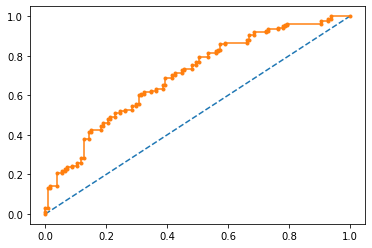

In [321]:
probs_te_lr = best_grid_lr.predict_proba(x_test)
probs_te_lr = probs_te_lr[:, 1]
auc_te_lr = roc_auc_score(test_labels, probs_te_lr)
print('AUC: %.3f' % auc_te_lr)
fpr_te_lr, tpr_te_lr, thresholds_te_lr = roc_curve(test_labels, probs_te_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lr, tpr_te_lr, marker='.')
plt.show()

**Linear Discriminant Analysis Model 1 performance**

Accuracy

In [322]:
model_score_lda_1 = best_grid_lda.score(x_train,train_labels)
print('Accuracy Score of training data is ',model_score_lda_1)

Accuracy Score of training data is  0.6836065573770492


In [323]:
model_score_lda_1 = best_grid_lda.score(x_test,test_labels)
print('Accuracy Score of test data is ',model_score_lda_1)

Accuracy Score of test data is  0.6106870229007634


Confusion Matrix

In [324]:
confusion_matrix(train_labels,ytrain_predict_lda_1)

array([[284,  60],
       [133, 133]], dtype=int64)

In [325]:
confusion_matrix(test_labels,ytest_predict_lda_1)

array([[104,  23],
       [ 79,  56]], dtype=int64)

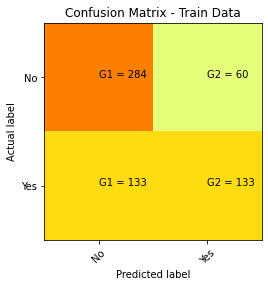

In [326]:
cm = metrics.confusion_matrix(train_labels, ytrain_predict_lda_1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

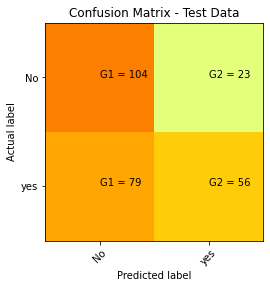

In [327]:
cm = metrics.confusion_matrix(test_labels, ytest_predict_lda_1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification report

In [328]:
print(classification_report(train_labels,ytrain_predict_lda_1))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       344
           1       0.69      0.50      0.58       266

    accuracy                           0.68       610
   macro avg       0.69      0.66      0.66       610
weighted avg       0.68      0.68      0.67       610



In [329]:
print(classification_report(test_labels,ytest_predict_lda_1))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67       127
           1       0.71      0.41      0.52       135

    accuracy                           0.61       262
   macro avg       0.64      0.62      0.60       262
weighted avg       0.64      0.61      0.59       262



ROC curve and AUC 

AUC: 0.738


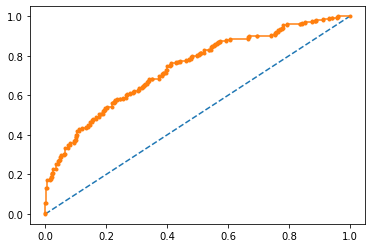

In [330]:
probs_tr_lda_1 = best_grid_lda.predict_proba(x_train)
probs_tr_lda_1 = probs_tr_lda_1[:, 1]
auc_tr_lda_1 = roc_auc_score(train_labels, probs_tr_lda_1)
print('AUC: %.3f' % auc_tr_lda_1)
fpr_tr_lda_1, tpr_tr_lda_1, thresholds_tr_lda_1 = roc_curve(train_labels, probs_tr_lda_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lda_1, tpr_tr_lda_1, marker='.')
plt.show()

AUC: 0.699


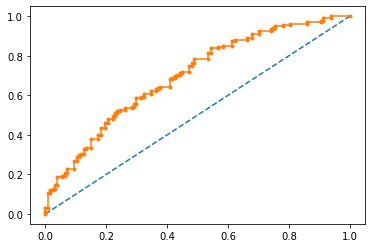

In [331]:
probs_te_lda_1 = best_grid_lda.predict_proba(x_test)
probs_te_lda_1 = probs_te_lda_1[:, 1]
auc_te_lda_1 = roc_auc_score(test_labels, probs_te_lda_1)
print('AUC: %.3f' % auc_te_lda_1)
fpr_te_lda_1, tpr_te_lda_1, thresholds_te_lda_1 = roc_curve(test_labels, probs_te_lda_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lda_1, tpr_te_lda_1, marker='.')
plt.show()

**Linear Discriminant Analysis Model 2 performance**

Accuracy

In [332]:
model_score_lda_2 = model_lda_2.score(x_train,train_labels)
print('Accuracy Score of training data is ',model_score_lda_2)

Accuracy Score of training data is  0.6836065573770492


In [333]:
model_score_lda_2 = model_lda_2.score(x_test,test_labels)
print('Accuracy Score of test data is ',model_score_lda_2)

Accuracy Score of test data is  0.6145038167938931


Confusion Matrix

In [334]:
confusion_matrix(train_labels,ytrain_predict_lda_2)

array([[279,  65],
       [128, 138]], dtype=int64)

In [335]:
confusion_matrix(test_labels,ytest_predict_lda_2)

array([[102,  25],
       [ 76,  59]], dtype=int64)

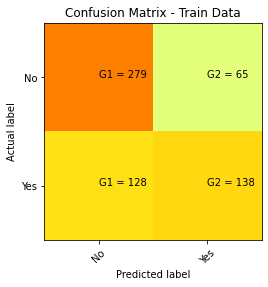

In [336]:
cm = metrics.confusion_matrix(train_labels, ytrain_predict_lda_2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

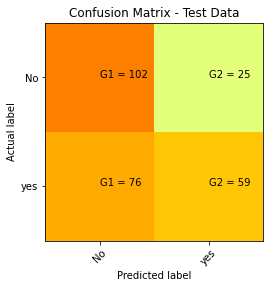

In [337]:
cm = metrics.confusion_matrix(test_labels, ytest_predict_lda_2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification report

In [338]:
print(classification_report(train_labels,ytrain_predict_lda_2))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.52      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.66      0.67       610
weighted avg       0.68      0.68      0.68       610



In [339]:
print(classification_report(test_labels,ytest_predict_lda_2))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       127
           1       0.70      0.44      0.54       135

    accuracy                           0.61       262
   macro avg       0.64      0.62      0.60       262
weighted avg       0.64      0.61      0.60       262



ROC curve and AUC

AUC: 0.740


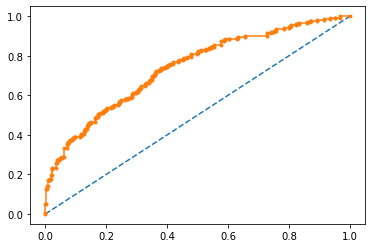

In [340]:
probs_tr_lda_2 = model_lda_2.predict_proba(x_train)
probs_tr_lda_2 = probs_tr_lda_2[:, 1]
auc_tr_lda_2 = roc_auc_score(train_labels, probs_tr_lda_2)
print('AUC: %.3f' % auc_tr_lda_2)
fpr_tr_lda_2, tpr_tr_lda_2, thresholds_tr_lda_2 = roc_curve(train_labels, probs_tr_lda_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lda_2, tpr_tr_lda_2, marker='.')
plt.show()

AUC: 0.698


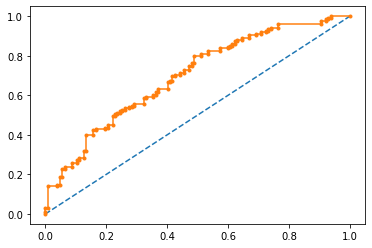

In [341]:
probs_te_lda_2 = model_lda_2.predict_proba(x_test)
probs_te_lda_2 = probs_te_lda_2[:, 1]
auc_te_lda_2 = roc_auc_score(test_labels, probs_te_lda_2)
print('AUC: %.3f' % auc_te_lda_2)
fpr_te_lda_2, tpr_te_lda_2, thresholds_te_lda_2 = roc_curve(test_labels, probs_te_lda_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lda_2, tpr_te_lda_2, marker='.')
plt.show()

**Final Model**

Training data

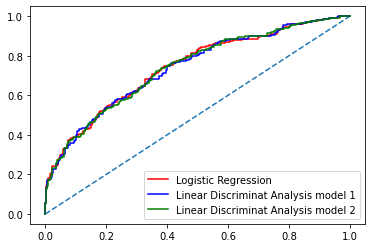

In [342]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lr, tpr_tr_lr,color="red",label="Logistic Regression")
plt.plot(fpr_tr_lda_1, tpr_tr_lda_1,color="blue",label="Linear Discriminat Analysis model 1")
plt.plot(fpr_tr_lda_2, tpr_tr_lda_2,color="green",label="Linear Discriminat Analysis model 2")
plt.legend()
plt.show()

Testing Data

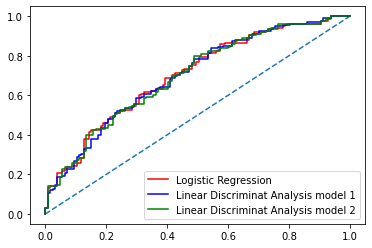

In [343]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lr, tpr_te_lr,color="red",label="Logistic Regression")
plt.plot(fpr_te_lda_1, tpr_te_lda_1,color="blue",label="Linear Discriminat Analysis model 1")
plt.plot(fpr_te_lda_2, tpr_te_lda_2,color="green",label="Linear Discriminat Analysis model 2")
plt.legend()
plt.show()

**2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

Based on the analysis, we can find the following insights,

1. The salary of an employee does not affect the outcome of an employee opting for the holiday package and not opting for the holiday package.

2.	Most of the foreign employees opt for the Holiday package.

3.	The employees who have no young children opt more for the package.
4.	The employees who have one or more young children do not opt more for the package.
5.	The employees who have no or one older children, they do not opt more for the package.
6.	If the employees have two or three older children, they opt more for the package.
7.	However there is not enough data to comment on the employees who have four or more children.
8.	The employees who had a formal education for eight to twelve years, do not opt more for the package.
9.	The employees who had a formal education less than eight or more than twelve opt more for the package.
10.	The employees who are of middle age (thirty to fifty) opt more for the package


**Recommendations for the business**

1.	The company must target employees who are of middle age, as they are more likely to accept the package.
2.	However, the middle aged employees may have young and old children. So the company must look to extend the package to include their children, which will tempt them to take the package.
3.	If the company can include places of visits which are kid friendly and packages including theme park visits, thereby providing an opportunity for the employees with kids to opt for the package.
4.	To tap into the middle aged employees with kids, the company should provide the package in the time which will also coincide with the summer and winter vacation of the children.
5.	The company will have more foreign employees who will opt for the package. So the company must look to target the foreign employees.
6.	The non-foreign middle aged employees are large in numbers. They can be made into potential customers if the company can provide a better holiday package deals, with discounts and offers on hotels, and dining restaurants.
7.	The employees with formal education years between eight and twelve do not tend to opt for the package. The reason for this should be investigated.

8.	There are some factors like pet friendliness of the package, as many employees may have pets.
9.	The company should look to include the number of pets in the data set, which could prove important in our model building.
10.	The company should also look to include the type of work of the employees, which could prove to be important.
11.	The company should look to collect more of the data, which will help to classify the employees. Even as we have stated that salary variable does not contribute much to the classification, more data will help to validate our insight.

**Important features for Model buliding.**

The five important variables for model building in this dataset are,

1.	Foreign – If the employees are foreign, they opt more for the package.
2.	Number of young children – If the employees have one or more young children, they don’t opt more for the package.
3.	Number of older children – If the employees have no or one children opt out of the package more.
4.	Age – If the employees are middle aged (aged between thirty and fifty), they opt more for the package.
5.	Education – The bizzare and interesting find of our analysis is that if the employees have a formal education of eight to twelve years, they opt out of the package more.
